### EDA on Breast Cancer Dataset

In [52]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### PHASE 2: Exploratory Data Analysis(EDA)

In [53]:
# Load the cleaned data set
breast_cancer_df = pd.read_csv('cleaned_breast_cancer_dataset.csv')

In [54]:
# Set the case id as the index
breast_cancer_df.set_index("id", inplace=True)

In [55]:
# Display the first two rows
breast_cancer_df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [56]:
# Extract the numerical columns
num_cols = breast_cancer_df.select_dtypes('number')

In [57]:
num_cols.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [58]:
# Extract the Categorical column(s)
cat_cols = [x for x in breast_cancer_df.columns if x not in num_cols]

In [59]:
# View the categorical column(s)
cat_cols

['diagnosis']

#### Conduct descriptive statistics to summarize the key characteristics of the data

In [60]:
# Define a function to check the statistical summary
def univariate_numerical__eda(df, column):
    """
    Perform univariate EDA on each numerical columns.
    Display the statistical summary, skewness, kurtosis, histogram, KDE and boxplot
    """
    print(f"\nFeature: {column}")
    print("-" * 40)
    print(f"Descriptive Summary: {df[column].describe().to_frame()}")
    print(f"Skewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")

    plt.figure(figsize=(12,6))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"\nDistribution of {column}", fontsize=13)
    plt.xlabel(column)
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f"\nBox plot of {column}", fontsize=13)
    plt.tight_layout()
    plt.show()

    # Transformation
    if abs(df[column].skew()) > 1:
        print(f"\n{column} is highly skewed, consider log transformation or Box-cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"\n{column} is moderately skewed")
    else:
        print(f"\n{column} is fairly symmetric")


Feature: radius_mean
----------------------------------------
Descriptive Summary:        radius_mean
count   569.000000
mean     14.127292
std       3.524049
min       6.981000
25%      11.700000
50%      13.370000
75%      15.780000
max      28.110000
Skewness: 0.942
Kurtosis: 0.846


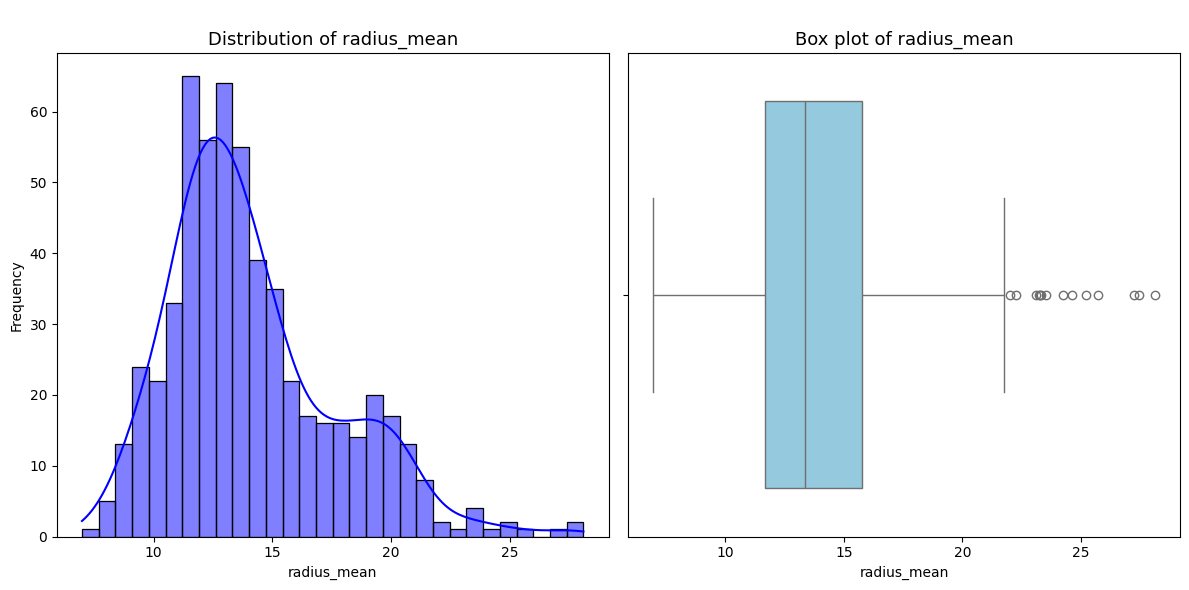


radius_mean is moderately skewed

Feature: texture_mean
----------------------------------------
Descriptive Summary:        texture_mean
count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Skewness: 0.650
Kurtosis: 0.758


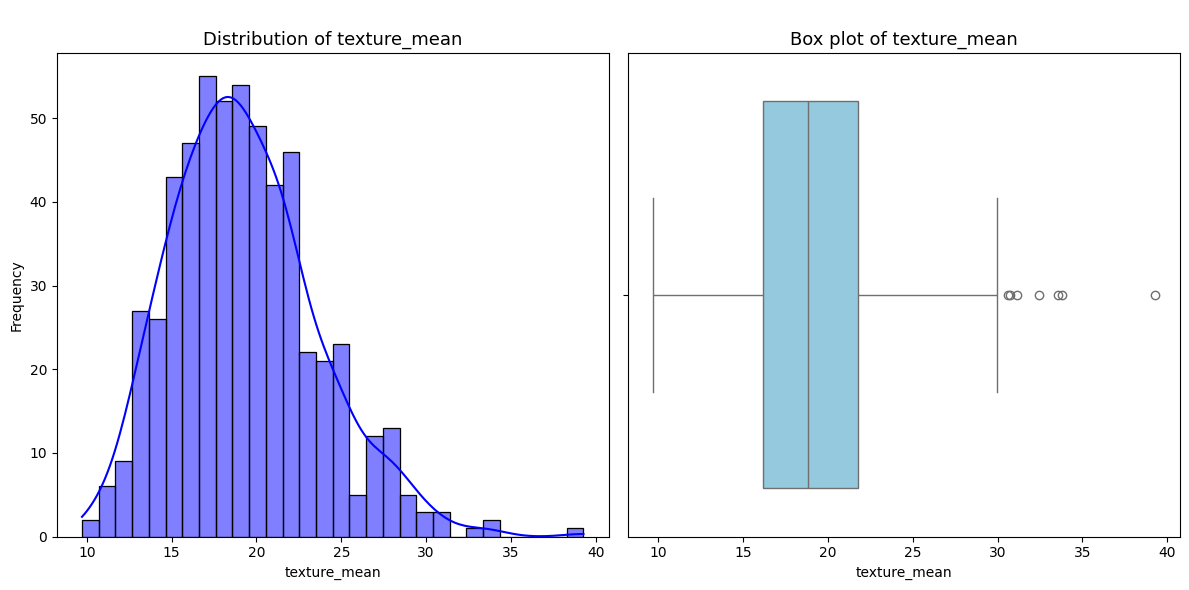


texture_mean is moderately skewed

Feature: perimeter_mean
----------------------------------------
Descriptive Summary:        perimeter_mean
count      569.000000
mean        91.969033
std         24.298981
min         43.790000
25%         75.170000
50%         86.240000
75%        104.100000
max        188.500000
Skewness: 0.991
Kurtosis: 0.972


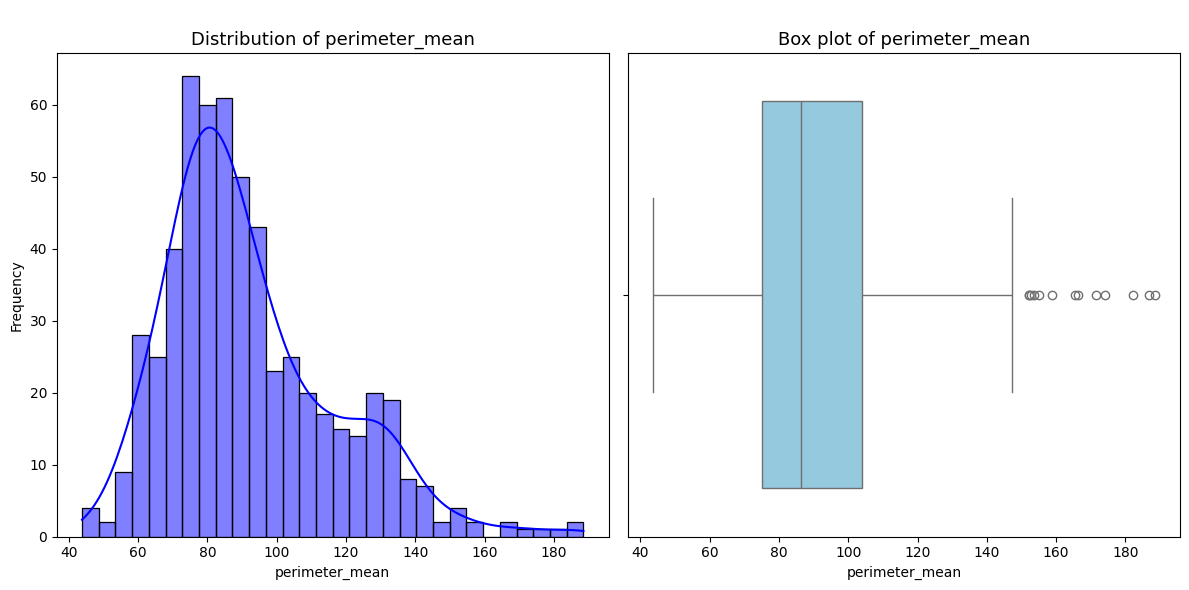


perimeter_mean is moderately skewed

Feature: area_mean
----------------------------------------
Descriptive Summary:          area_mean
count   569.000000
mean    654.889104
std     351.914129
min     143.500000
25%     420.300000
50%     551.100000
75%     782.700000
max    2501.000000
Skewness: 1.646
Kurtosis: 3.652


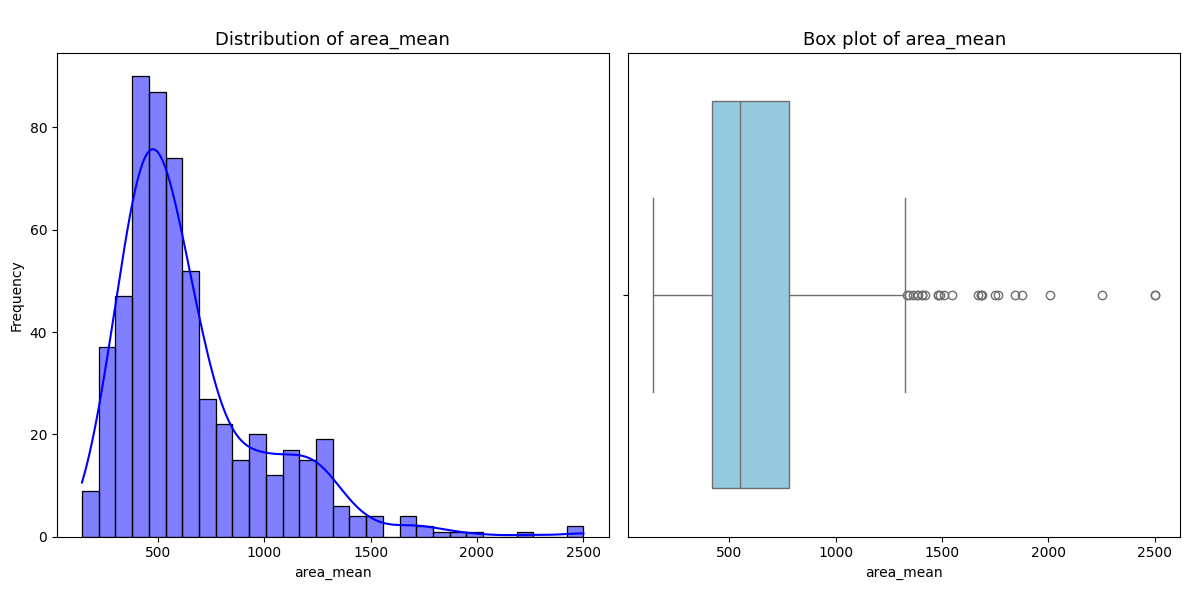


area_mean is highly skewed, consider log transformation or Box-cox transformation.

Feature: smoothness_mean
----------------------------------------
Descriptive Summary:        smoothness_mean
count       569.000000
mean          0.096360
std           0.014064
min           0.052630
25%           0.086370
50%           0.095870
75%           0.105300
max           0.163400
Skewness: 0.456
Kurtosis: 0.856


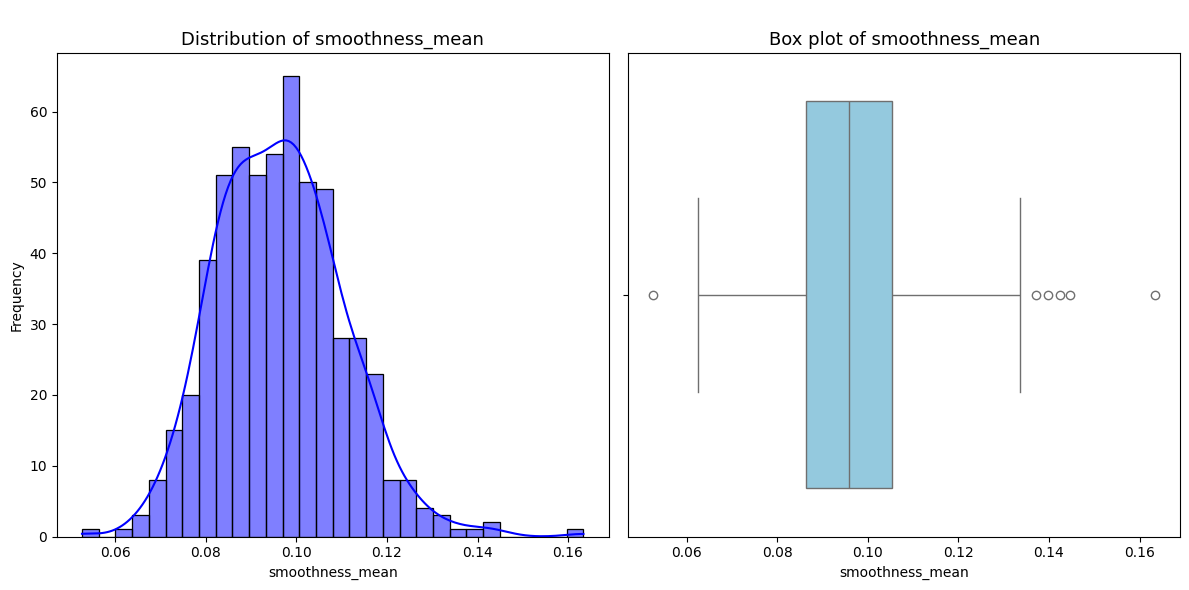


smoothness_mean is fairly symmetric

Feature: compactness_mean
----------------------------------------
Descriptive Summary:        compactness_mean
count        569.000000
mean           0.104341
std            0.052813
min            0.019380
25%            0.064920
50%            0.092630
75%            0.130400
max            0.345400
Skewness: 1.190
Kurtosis: 1.650


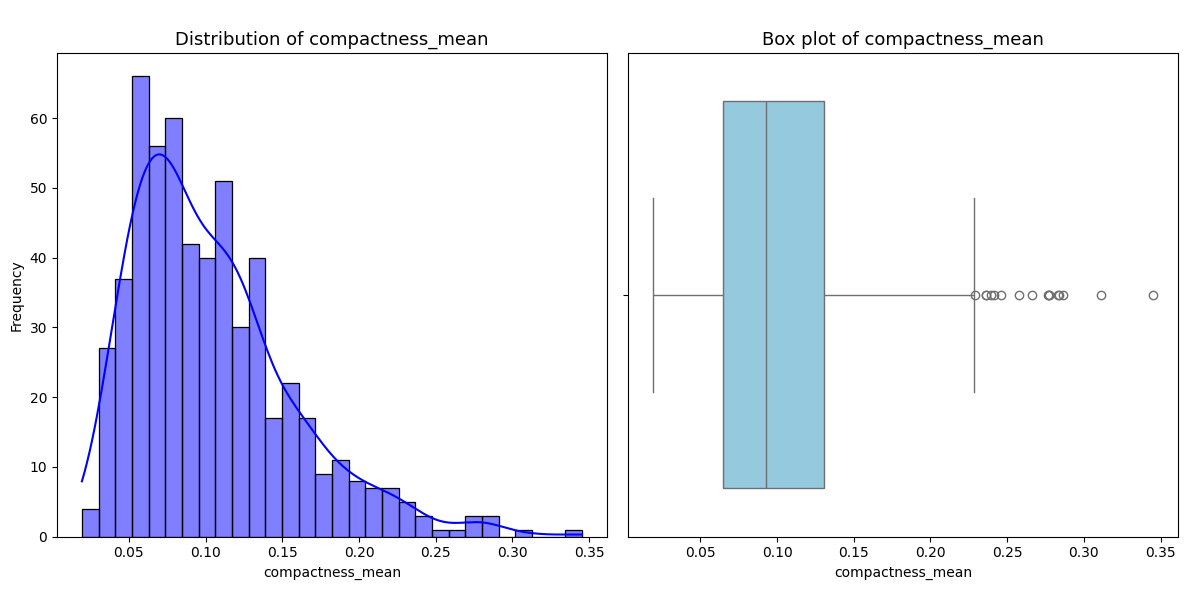


compactness_mean is highly skewed, consider log transformation or Box-cox transformation.

Feature: concavity_mean
----------------------------------------
Descriptive Summary:        concavity_mean
count      569.000000
mean         0.088799
std          0.079720
min          0.000000
25%          0.029560
50%          0.061540
75%          0.130700
max          0.426800
Skewness: 1.401
Kurtosis: 1.999


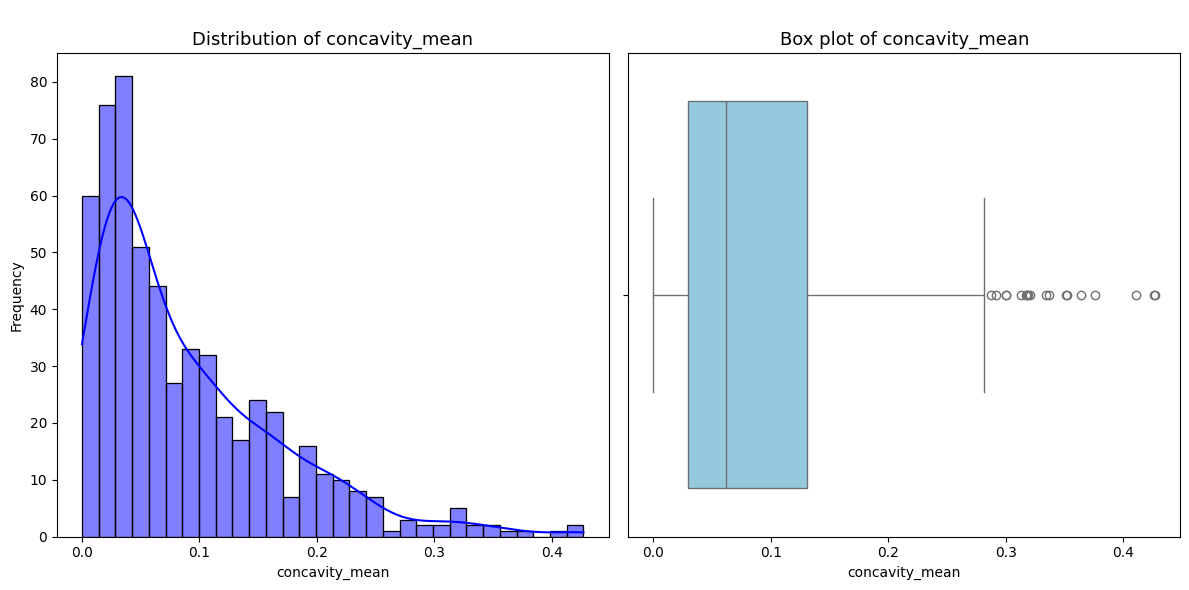


concavity_mean is highly skewed, consider log transformation or Box-cox transformation.

Feature: concave points_mean
----------------------------------------
Descriptive Summary:        concave points_mean
count           569.000000
mean              0.048919
std               0.038803
min               0.000000
25%               0.020310
50%               0.033500
75%               0.074000
max               0.201200
Skewness: 1.171
Kurtosis: 1.067


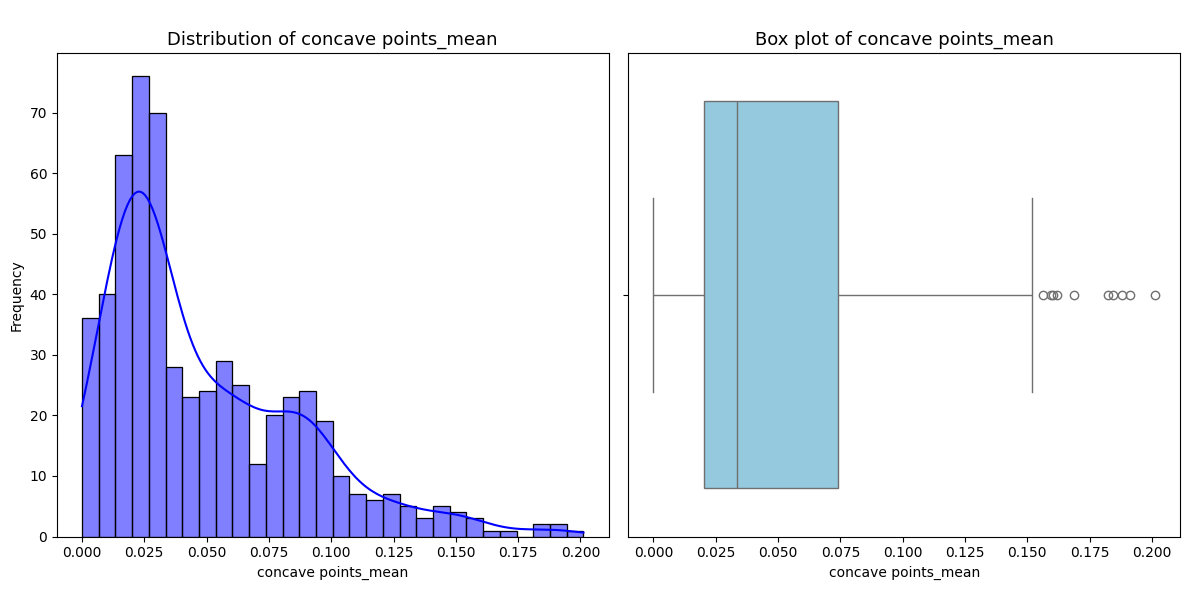


concave points_mean is highly skewed, consider log transformation or Box-cox transformation.

Feature: symmetry_mean
----------------------------------------
Descriptive Summary:        symmetry_mean
count     569.000000
mean        0.181162
std         0.027414
min         0.106000
25%         0.161900
50%         0.179200
75%         0.195700
max         0.304000
Skewness: 0.726
Kurtosis: 1.288


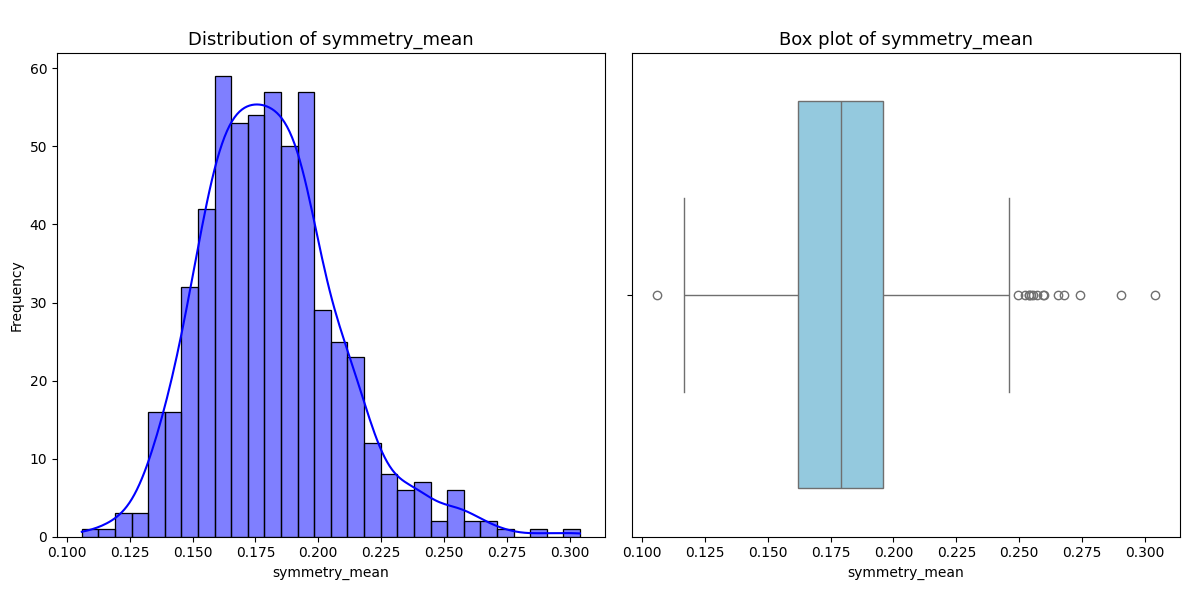


symmetry_mean is moderately skewed

Feature: fractal_dimension_mean
----------------------------------------
Descriptive Summary:        fractal_dimension_mean
count              569.000000
mean                 0.062798
std                  0.007060
min                  0.049960
25%                  0.057700
50%                  0.061540
75%                  0.066120
max                  0.097440
Skewness: 1.304
Kurtosis: 3.006


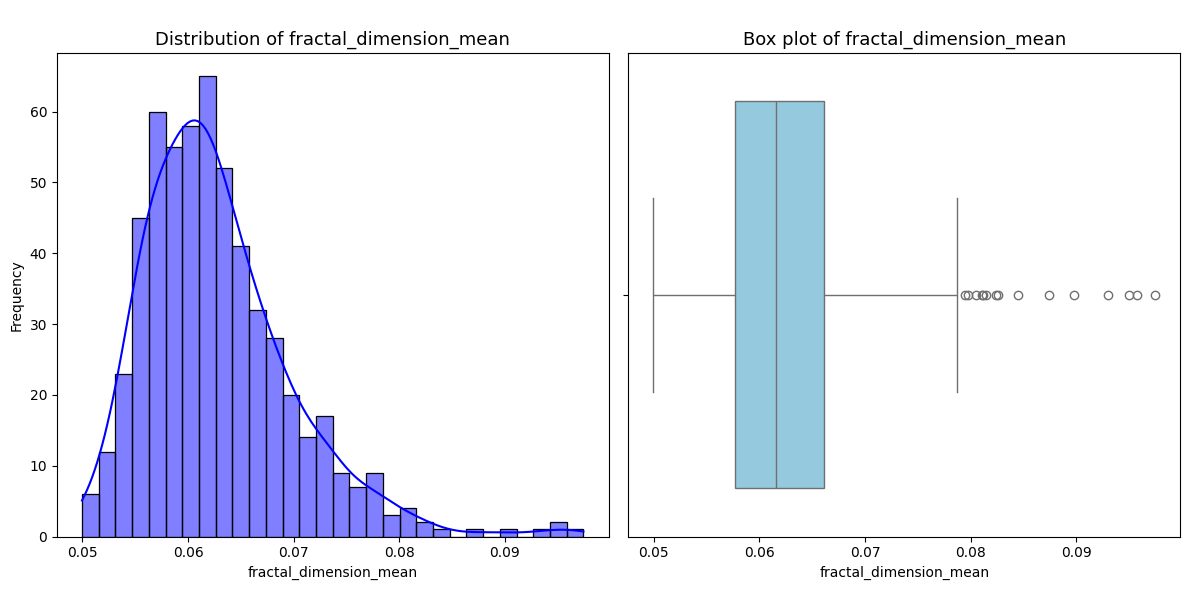


fractal_dimension_mean is highly skewed, consider log transformation or Box-cox transformation.

Feature: radius_se
----------------------------------------
Descriptive Summary:         radius_se
count  569.000000
mean     0.405172
std      0.277313
min      0.111500
25%      0.232400
50%      0.324200
75%      0.478900
max      2.873000
Skewness: 3.089
Kurtosis: 17.687


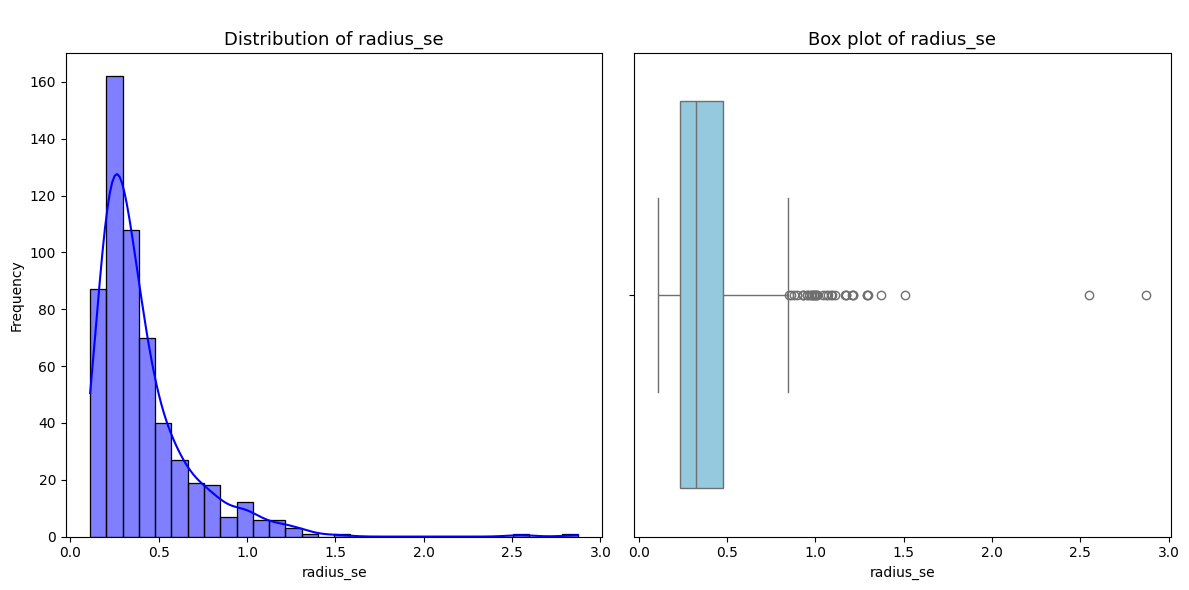


radius_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: texture_se
----------------------------------------
Descriptive Summary:        texture_se
count  569.000000
mean     1.216853
std      0.551648
min      0.360200
25%      0.833900
50%      1.108000
75%      1.474000
max      4.885000
Skewness: 1.646
Kurtosis: 5.349


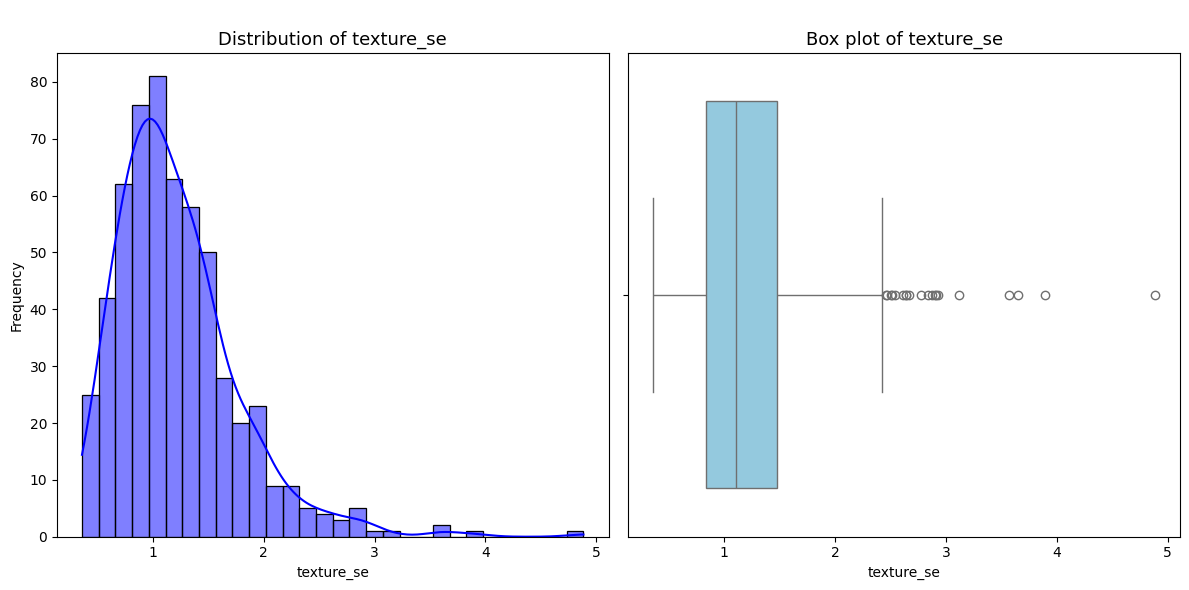


texture_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: perimeter_se
----------------------------------------
Descriptive Summary:        perimeter_se
count    569.000000
mean       2.866059
std        2.021855
min        0.757000
25%        1.606000
50%        2.287000
75%        3.357000
max       21.980000
Skewness: 3.444
Kurtosis: 21.402


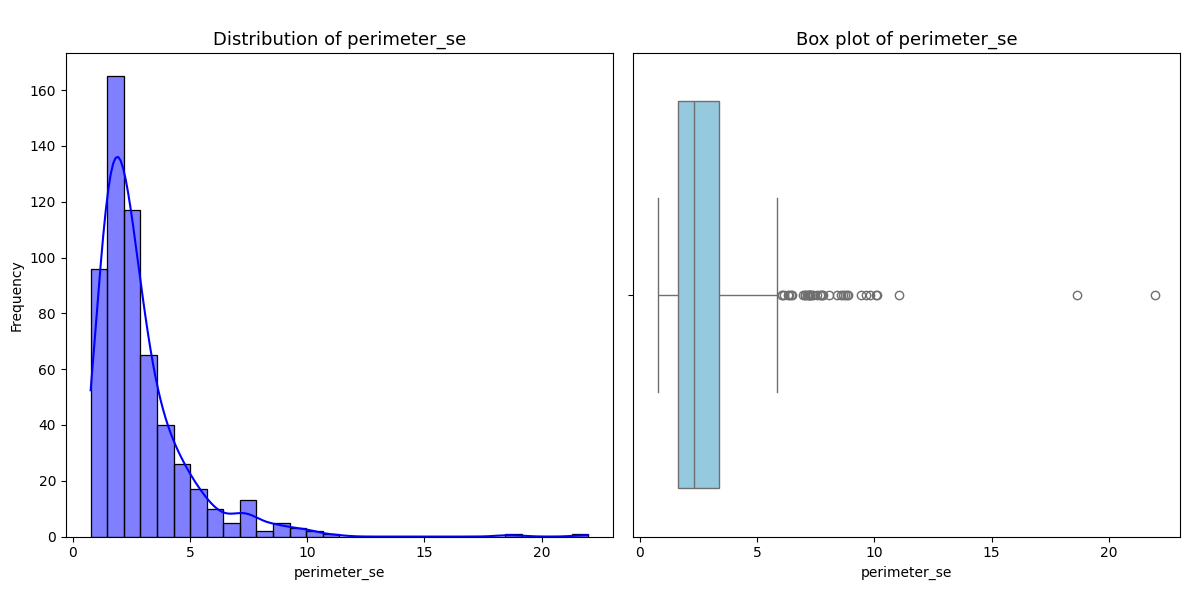


perimeter_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: area_se
----------------------------------------
Descriptive Summary:           area_se
count  569.000000
mean    40.337079
std     45.491006
min      6.802000
25%     17.850000
50%     24.530000
75%     45.190000
max    542.200000
Skewness: 5.447
Kurtosis: 49.209


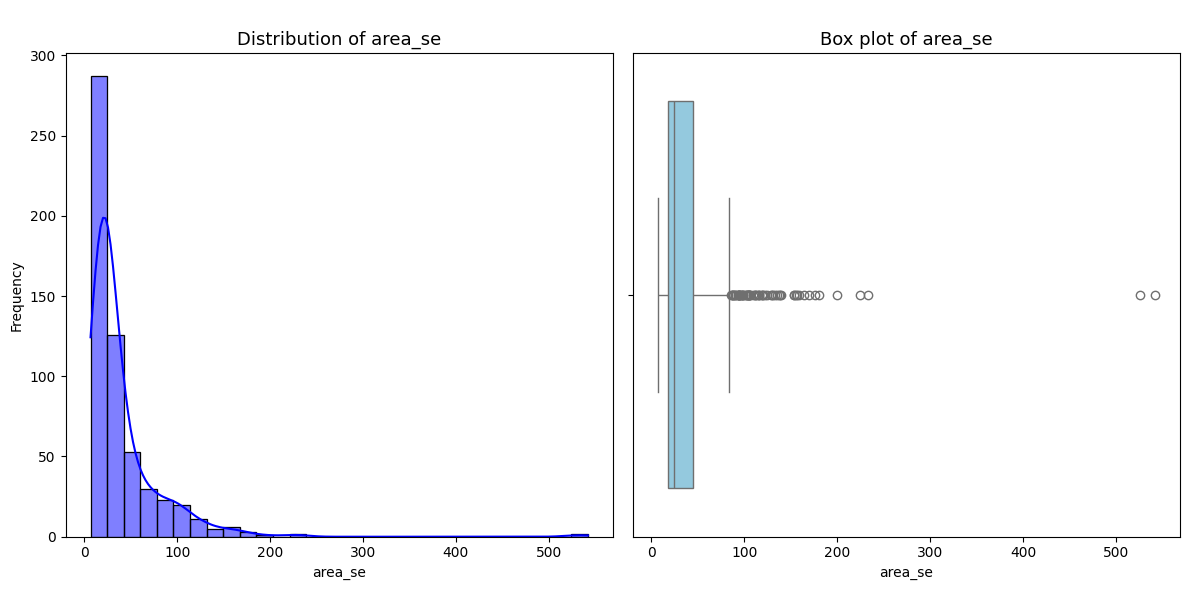


area_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: smoothness_se
----------------------------------------
Descriptive Summary:        smoothness_se
count     569.000000
mean        0.007041
std         0.003003
min         0.001713
25%         0.005169
50%         0.006380
75%         0.008146
max         0.031130
Skewness: 2.314
Kurtosis: 10.470


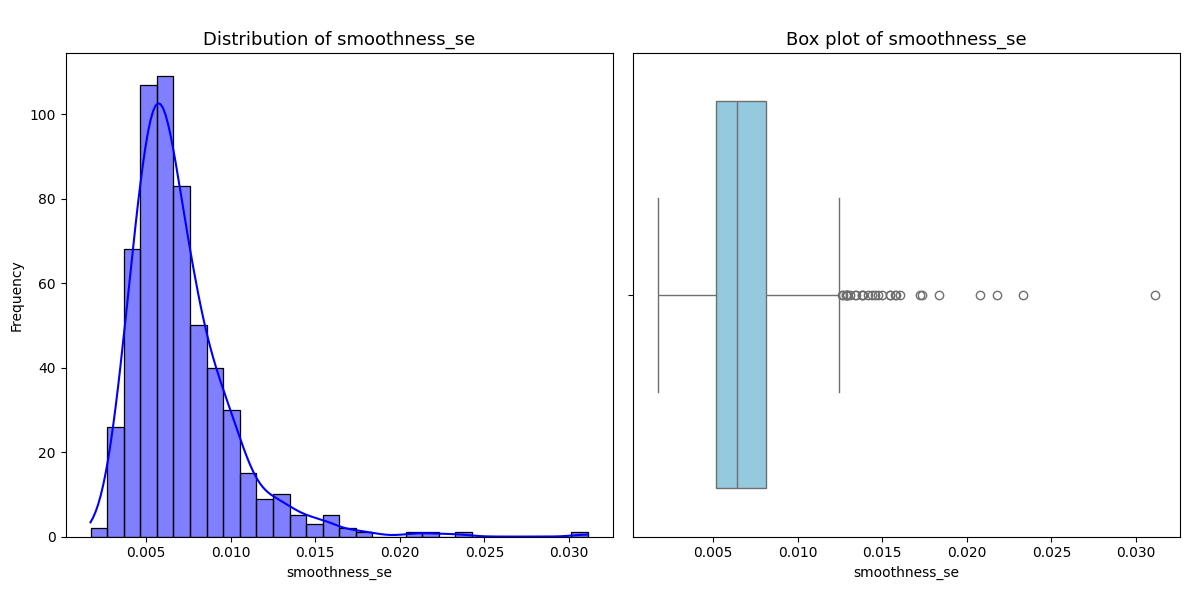


smoothness_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: compactness_se
----------------------------------------
Descriptive Summary:        compactness_se
count      569.000000
mean         0.025478
std          0.017908
min          0.002252
25%          0.013080
50%          0.020450
75%          0.032450
max          0.135400
Skewness: 1.902
Kurtosis: 5.106


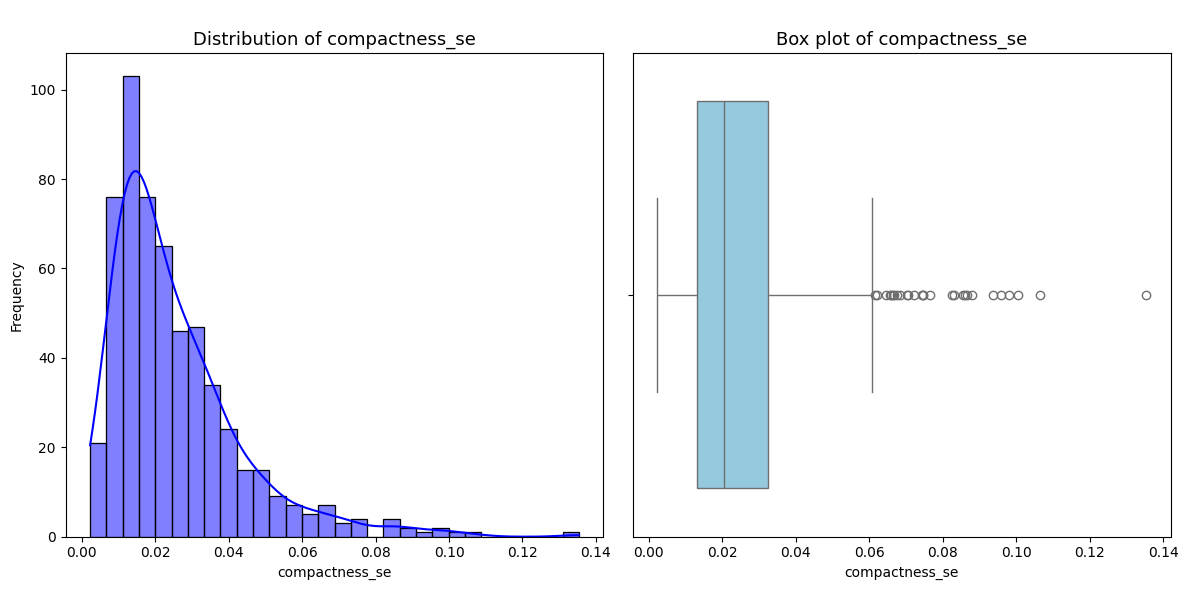


compactness_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: concavity_se
----------------------------------------
Descriptive Summary:        concavity_se
count    569.000000
mean       0.031894
std        0.030186
min        0.000000
25%        0.015090
50%        0.025890
75%        0.042050
max        0.396000
Skewness: 5.110
Kurtosis: 48.861


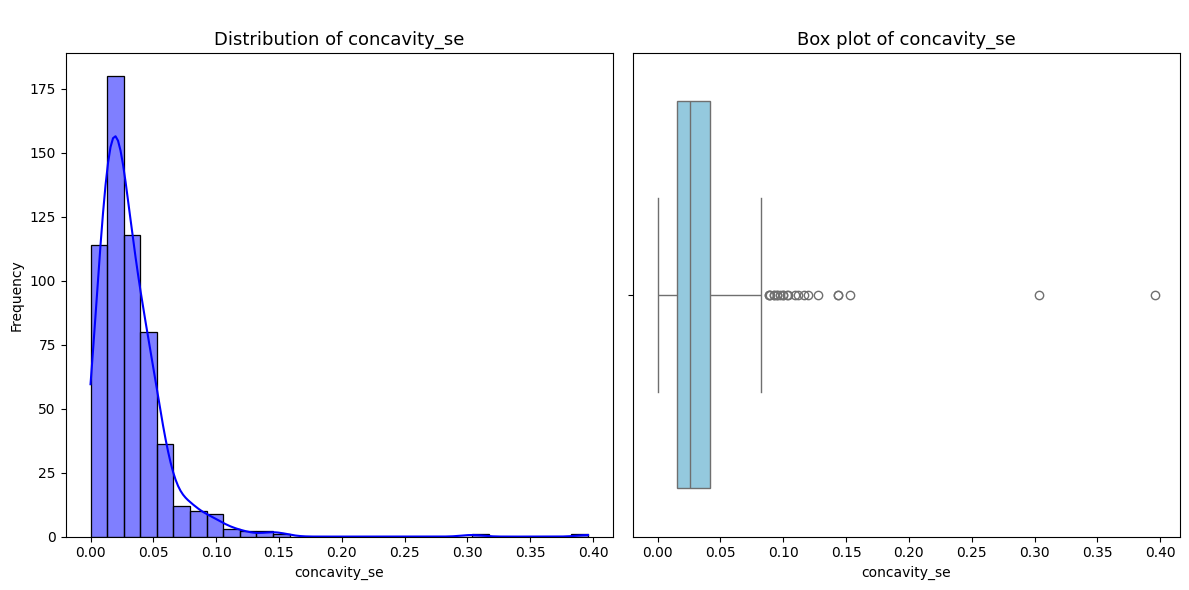


concavity_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: concave points_se
----------------------------------------
Descriptive Summary:        concave points_se
count         569.000000
mean            0.011796
std             0.006170
min             0.000000
25%             0.007638
50%             0.010930
75%             0.014710
max             0.052790
Skewness: 1.445
Kurtosis: 5.126


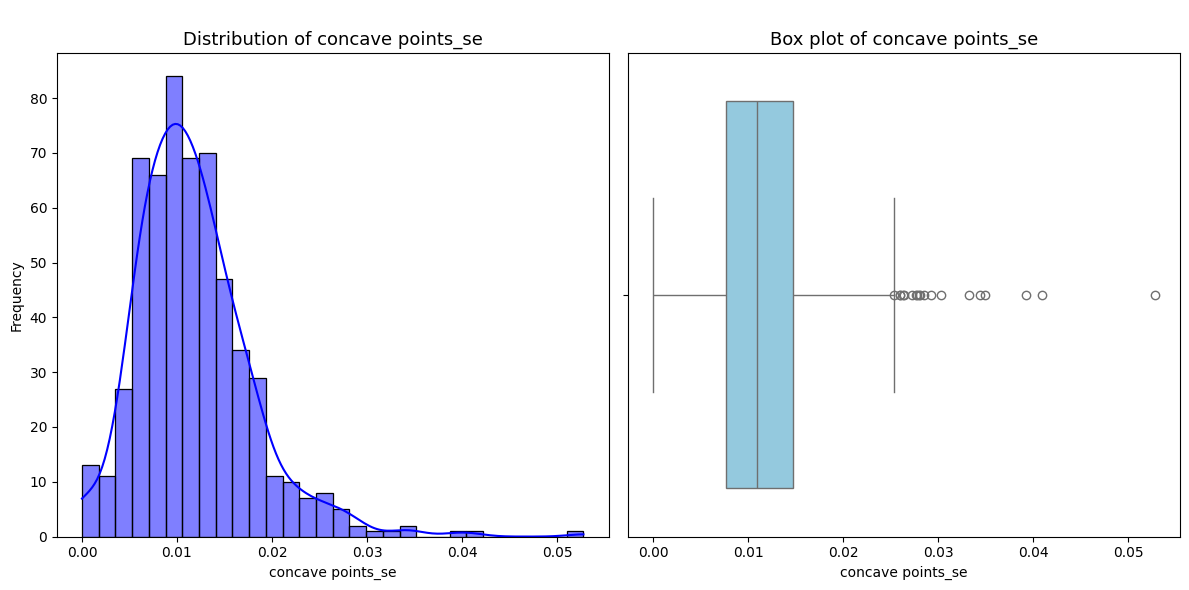


concave points_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: symmetry_se
----------------------------------------
Descriptive Summary:        symmetry_se
count   569.000000
mean      0.020542
std       0.008266
min       0.007882
25%       0.015160
50%       0.018730
75%       0.023480
max       0.078950
Skewness: 2.195
Kurtosis: 7.896


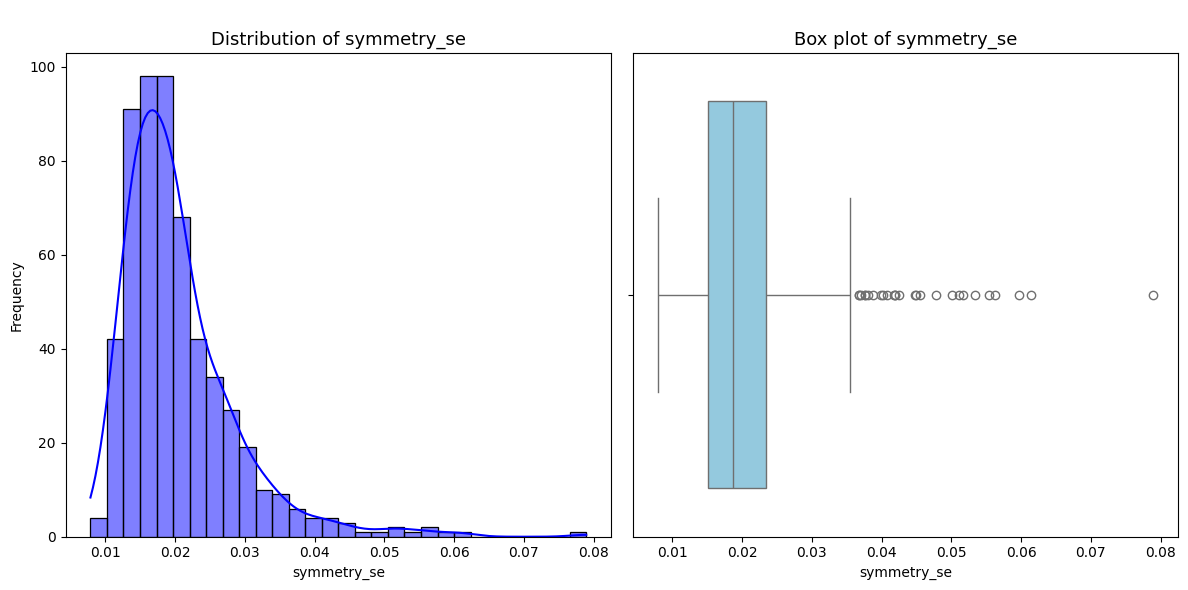


symmetry_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: fractal_dimension_se
----------------------------------------
Descriptive Summary:        fractal_dimension_se
count            569.000000
mean               0.003795
std                0.002646
min                0.000895
25%                0.002248
50%                0.003187
75%                0.004558
max                0.029840
Skewness: 3.924
Kurtosis: 26.281


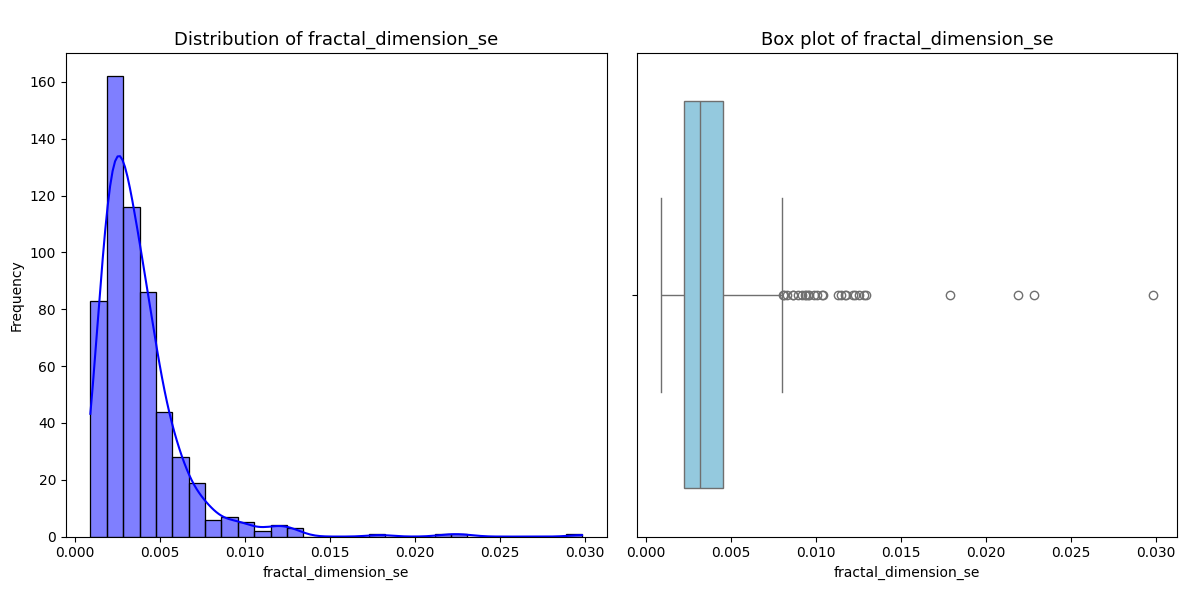


fractal_dimension_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: radius_worst
----------------------------------------
Descriptive Summary:        radius_worst
count    569.000000
mean      16.269190
std        4.833242
min        7.930000
25%       13.010000
50%       14.970000
75%       18.790000
max       36.040000
Skewness: 1.103
Kurtosis: 0.944


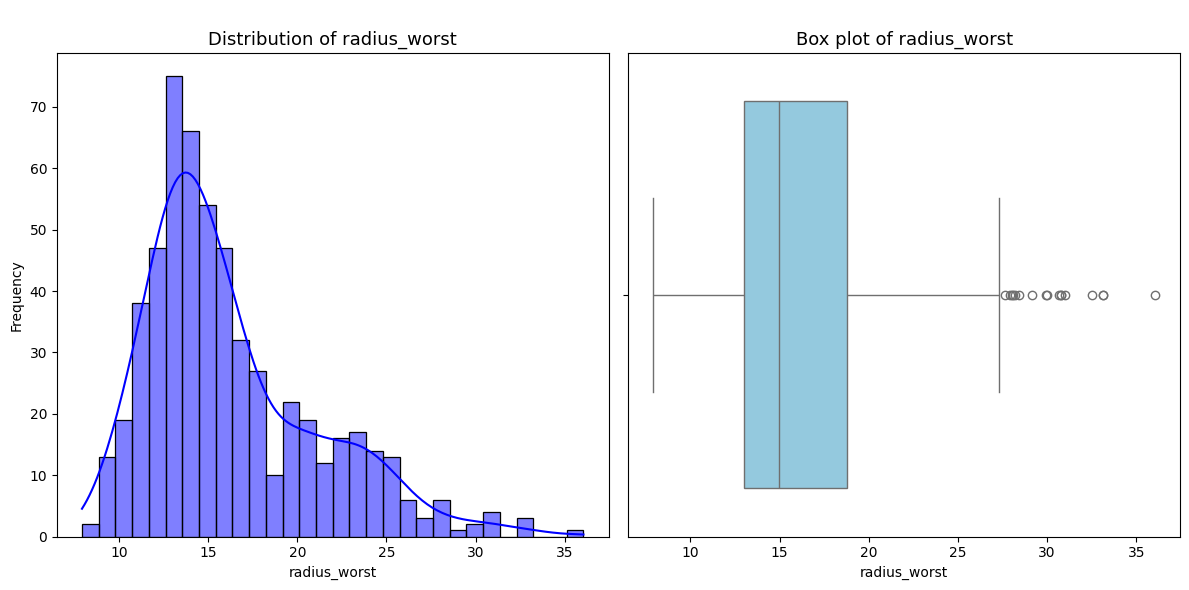


radius_worst is highly skewed, consider log transformation or Box-cox transformation.

Feature: texture_worst
----------------------------------------
Descriptive Summary:        texture_worst
count     569.000000
mean       25.677223
std         6.146258
min        12.020000
25%        21.080000
50%        25.410000
75%        29.720000
max        49.540000
Skewness: 0.498
Kurtosis: 0.224


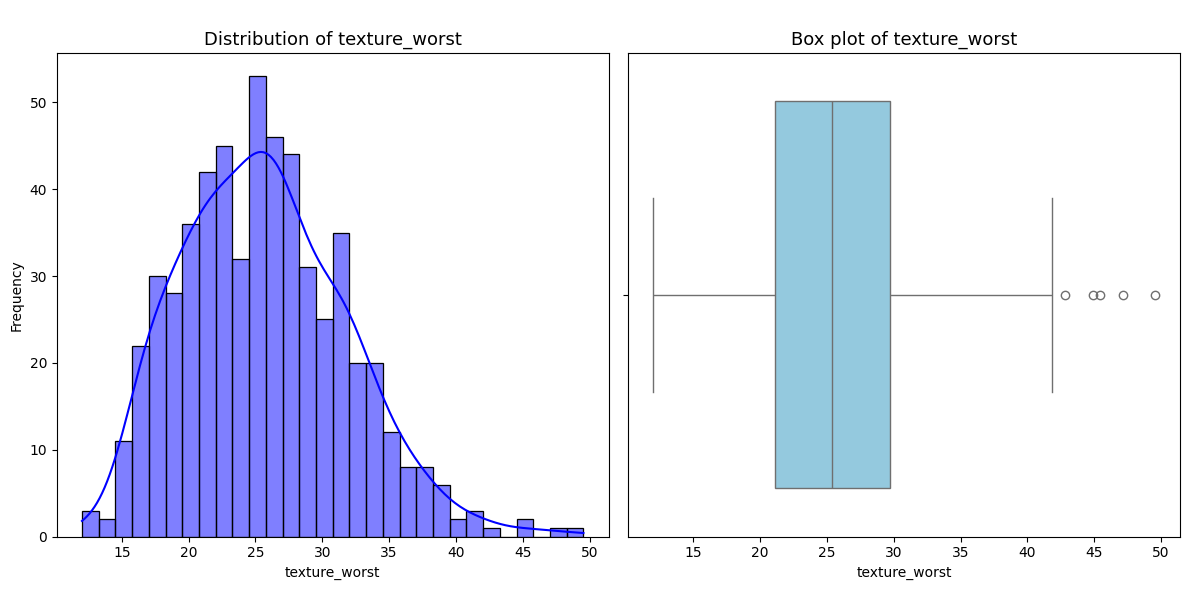


texture_worst is fairly symmetric

Feature: perimeter_worst
----------------------------------------
Descriptive Summary:        perimeter_worst
count       569.000000
mean        107.261213
std          33.602542
min          50.410000
25%          84.110000
50%          97.660000
75%         125.400000
max         251.200000
Skewness: 1.128
Kurtosis: 1.070


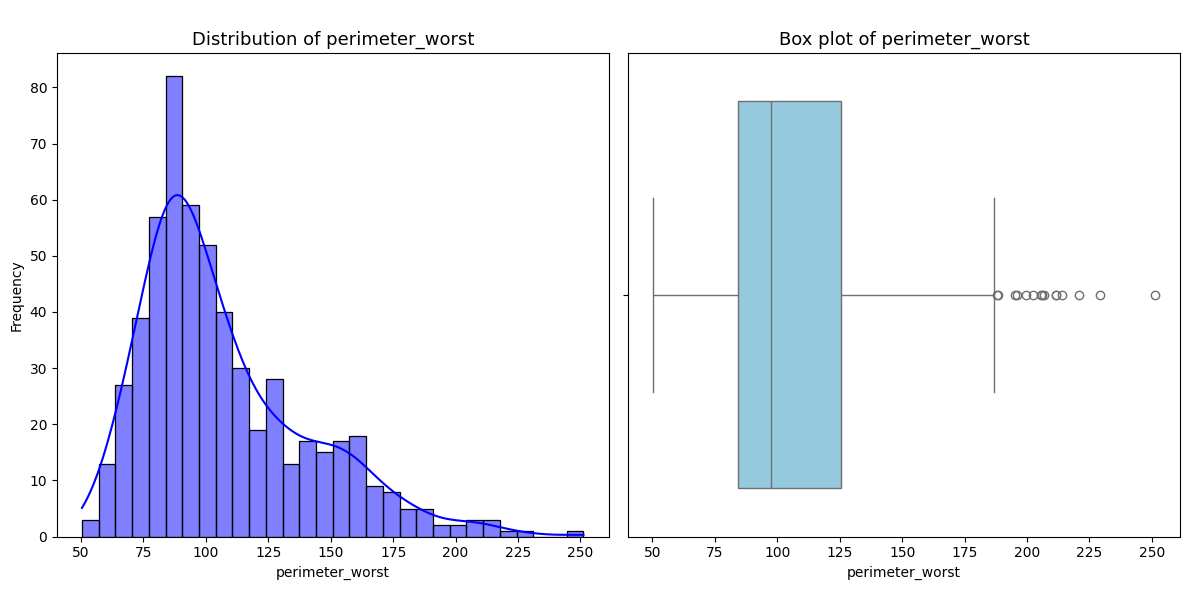


perimeter_worst is highly skewed, consider log transformation or Box-cox transformation.

Feature: area_worst
----------------------------------------
Descriptive Summary:         area_worst
count   569.000000
mean    880.583128
std     569.356993
min     185.200000
25%     515.300000
50%     686.500000
75%    1084.000000
max    4254.000000
Skewness: 1.859
Kurtosis: 4.396


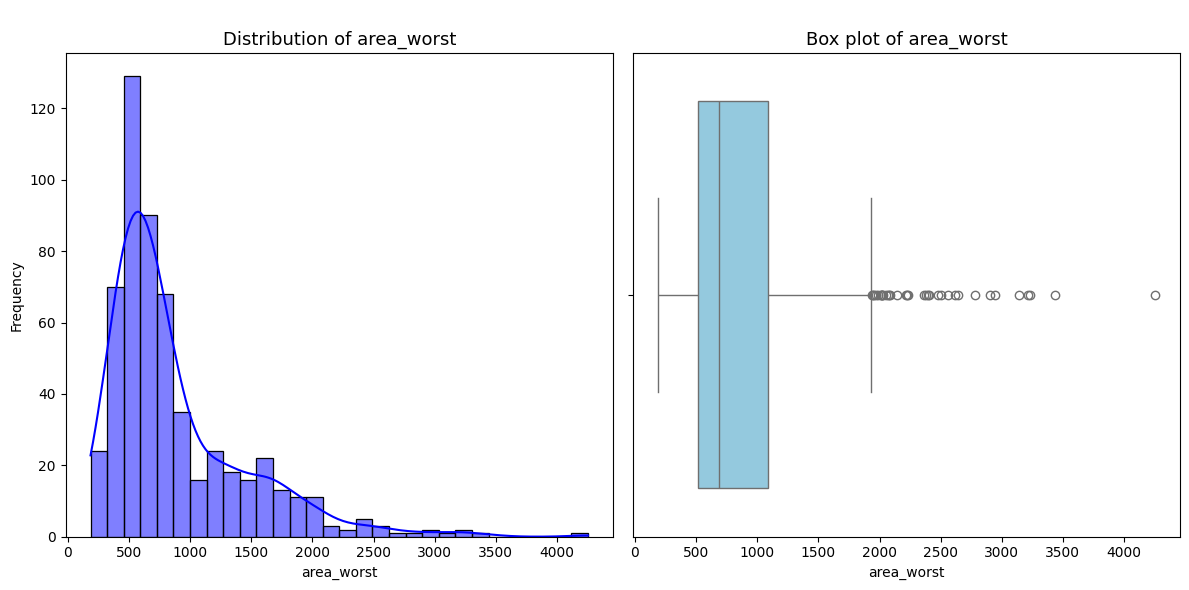


area_worst is highly skewed, consider log transformation or Box-cox transformation.

Feature: smoothness_worst
----------------------------------------
Descriptive Summary:        smoothness_worst
count        569.000000
mean           0.132369
std            0.022832
min            0.071170
25%            0.116600
50%            0.131300
75%            0.146000
max            0.222600
Skewness: 0.415
Kurtosis: 0.518


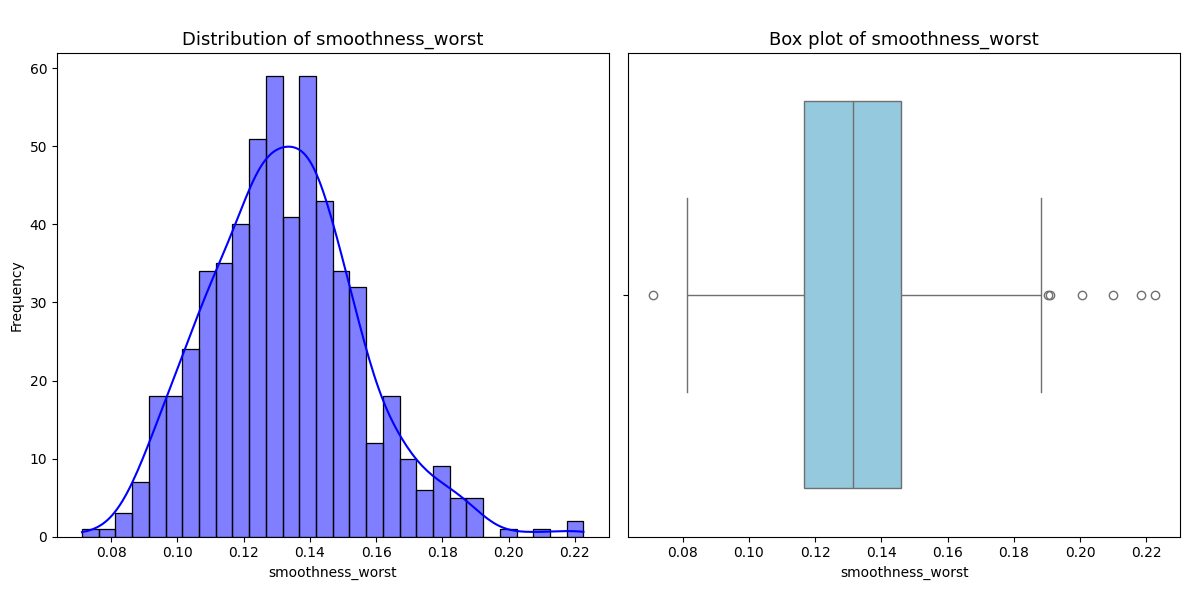


smoothness_worst is fairly symmetric

Feature: compactness_worst
----------------------------------------
Descriptive Summary:        compactness_worst
count         569.000000
mean            0.254265
std             0.157336
min             0.027290
25%             0.147200
50%             0.211900
75%             0.339100
max             1.058000
Skewness: 1.474
Kurtosis: 3.039


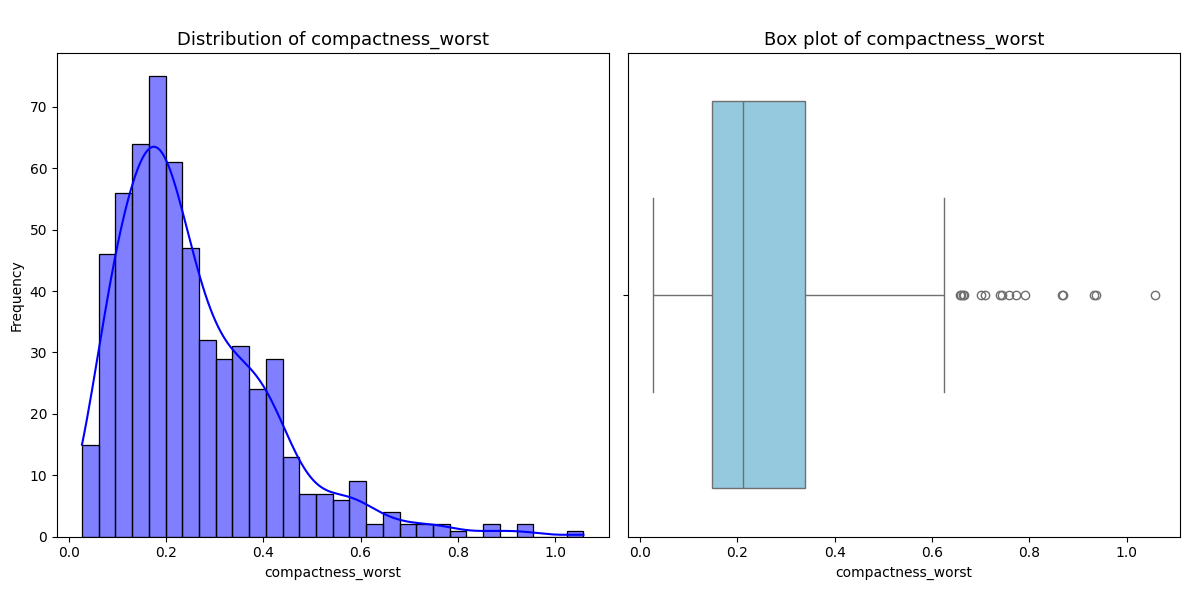


compactness_worst is highly skewed, consider log transformation or Box-cox transformation.

Feature: concavity_worst
----------------------------------------
Descriptive Summary:        concavity_worst
count       569.000000
mean          0.272188
std           0.208624
min           0.000000
25%           0.114500
50%           0.226700
75%           0.382900
max           1.252000
Skewness: 1.150
Kurtosis: 1.615


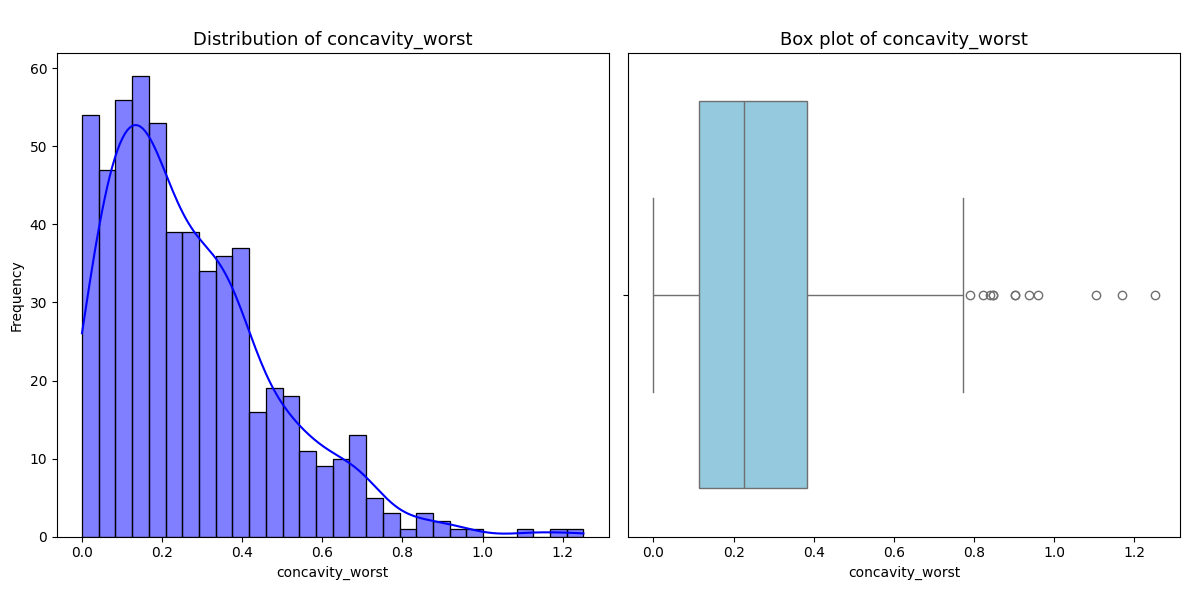


concavity_worst is highly skewed, consider log transformation or Box-cox transformation.

Feature: concave points_worst
----------------------------------------
Descriptive Summary:        concave points_worst
count            569.000000
mean               0.114606
std                0.065732
min                0.000000
25%                0.064930
50%                0.099930
75%                0.161400
max                0.291000
Skewness: 0.493
Kurtosis: -0.536


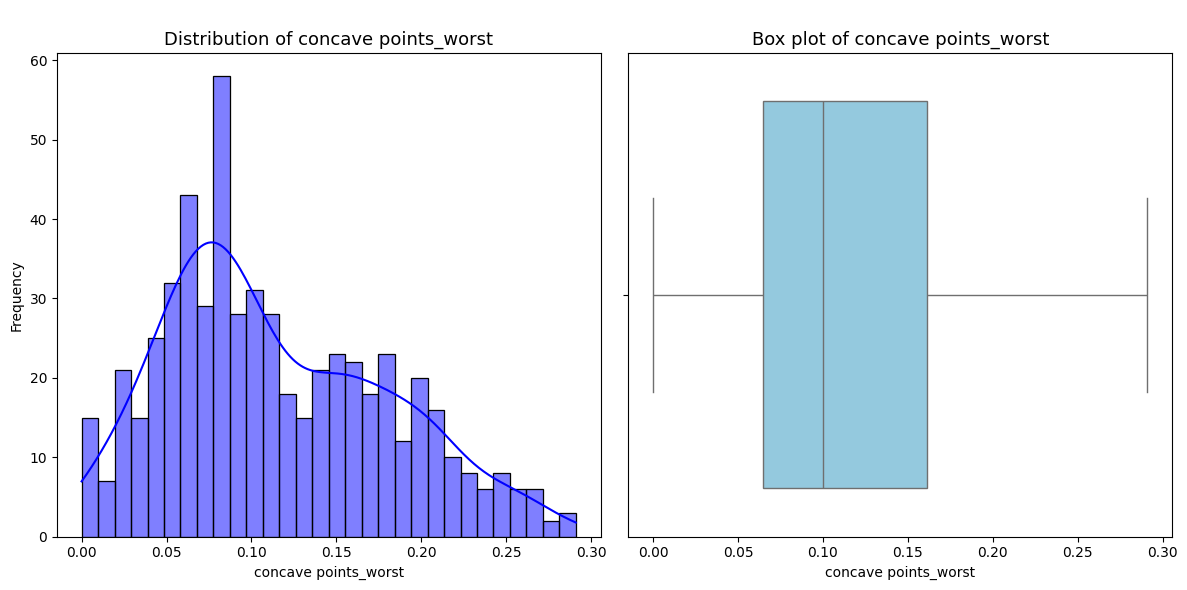


concave points_worst is fairly symmetric

Feature: symmetry_worst
----------------------------------------
Descriptive Summary:        symmetry_worst
count      569.000000
mean         0.290076
std          0.061867
min          0.156500
25%          0.250400
50%          0.282200
75%          0.317900
max          0.663800
Skewness: 1.434
Kurtosis: 4.445


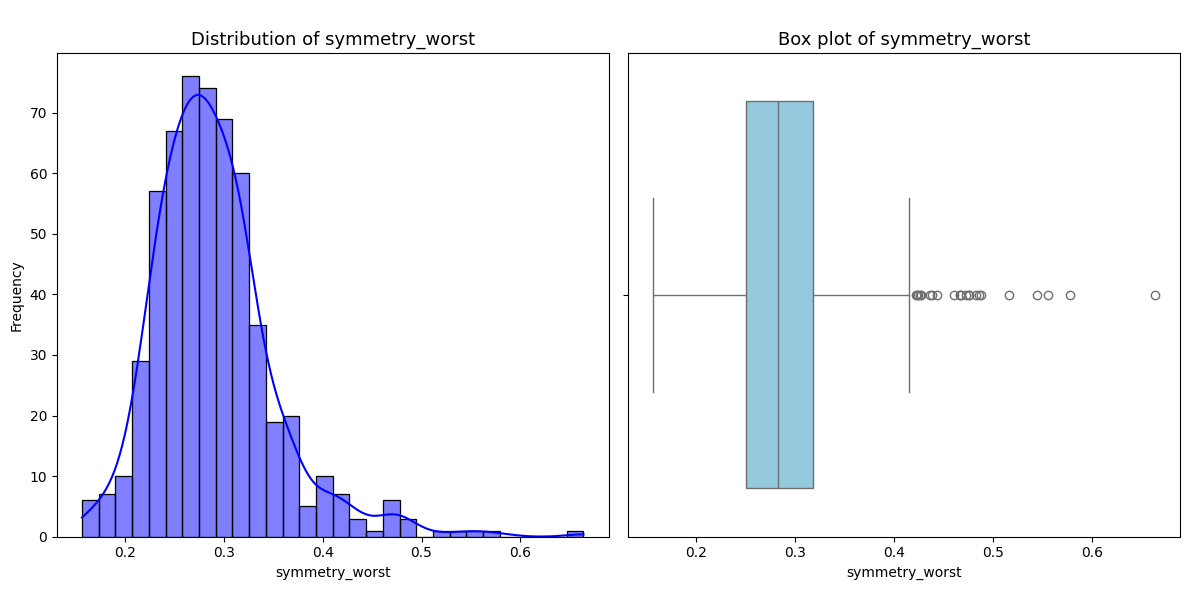


symmetry_worst is highly skewed, consider log transformation or Box-cox transformation.

Feature: fractal_dimension_worst
----------------------------------------
Descriptive Summary:        fractal_dimension_worst
count               569.000000
mean                  0.083946
std                   0.018061
min                   0.055040
25%                   0.071460
50%                   0.080040
75%                   0.092080
max                   0.207500
Skewness: 1.663
Kurtosis: 5.245


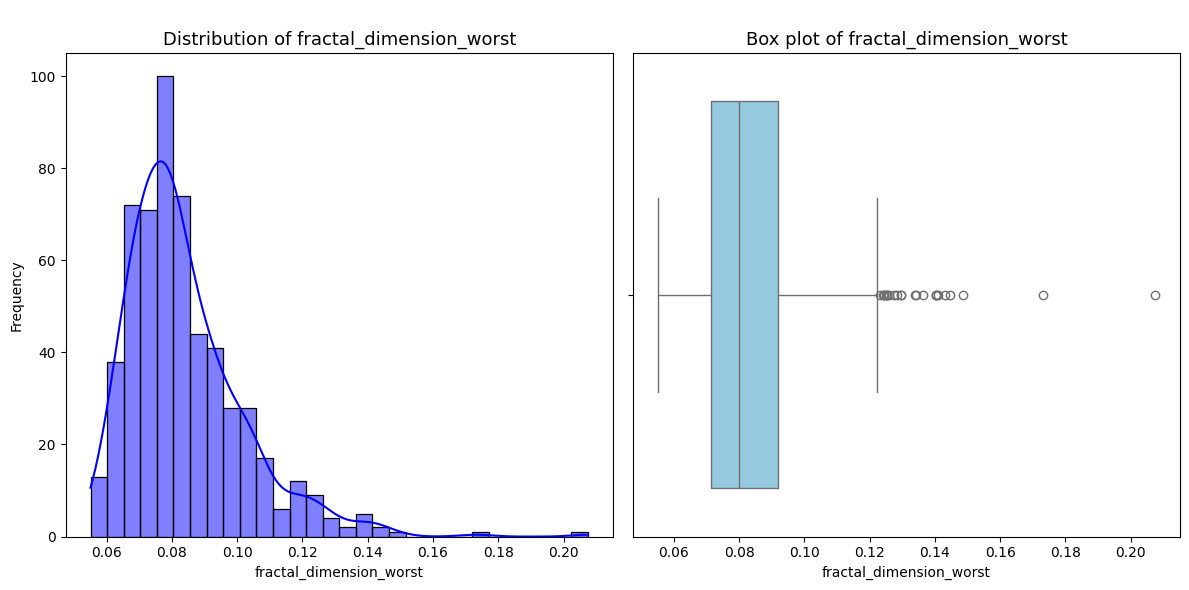


fractal_dimension_worst is highly skewed, consider log transformation or Box-cox transformation.


In [61]:
for col in num_cols:
    univariate_numerical__eda(breast_cancer_df, col)

### Bivariate Analysis

##### Examine the relationship between the features and the target variables(diagnosis)

In [69]:
def bivariate_num_cat(df, feature, target="quality_label"):
    """
    Plots and summarizes relationship between a numerical and a categorical target
    """
    print(f"Feature: {feature} vs {target}")
    print("="*50)

    #Group summary
    summary = df.groupby(target)[feature].describe()[['mean', 'std', 'min', 'max']]
    print(summary)
    print()

    plt.figure(figsize=(10,5))

    # Boxplot + mean line
    sns.boxplot(x=target, y=feature, data=df, palette="Set2")
    plt.title(f"{feature} across {target} categories", fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()




Feature: radius_mean vs diagnosis
                mean       std     min    max
diagnosis                                    
B          12.146524  1.780512   6.981  17.85
M          17.462830  3.203971  10.950  28.11



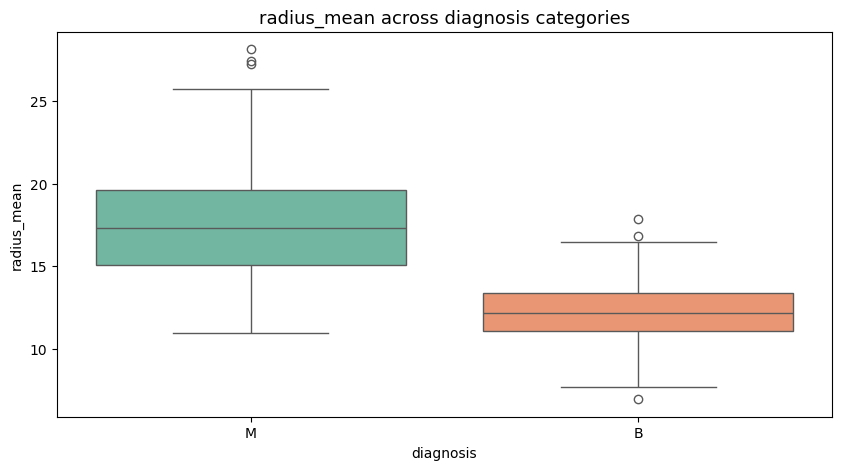

Feature: texture_mean vs diagnosis
                mean       std    min    max
diagnosis                                   
B          17.914762  3.995125   9.71  33.81
M          21.604906  3.779470  10.38  39.28



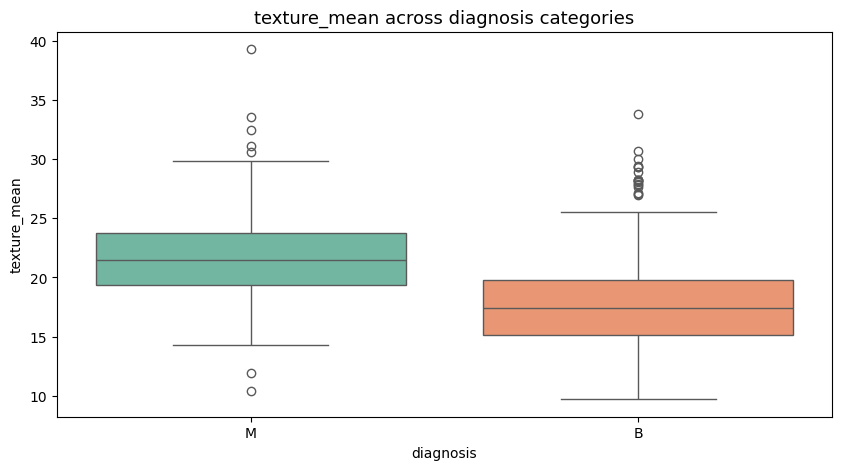

Feature: perimeter_mean vs diagnosis
                 mean        std    min    max
diagnosis                                     
B           78.075406  11.807438  43.79  114.6
M          115.365377  21.854653  71.90  188.5



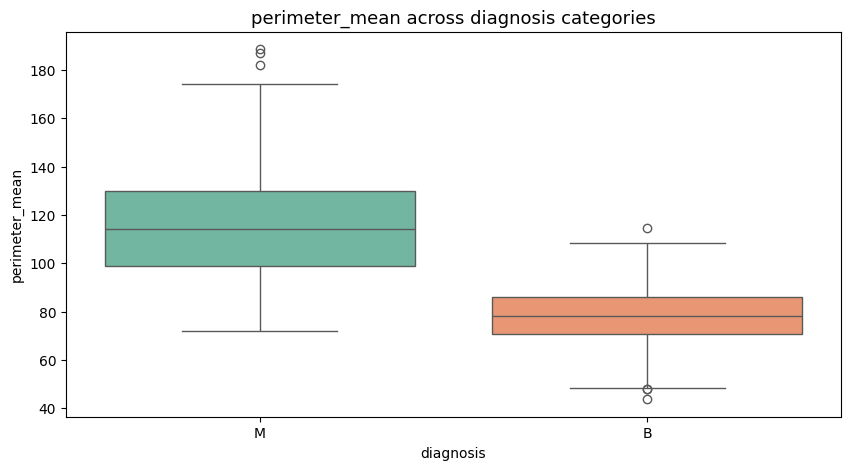

Feature: area_mean vs diagnosis
                 mean         std    min     max
diagnosis                                       
B          462.790196  134.287118  143.5   992.1
M          978.376415  367.937978  361.6  2501.0



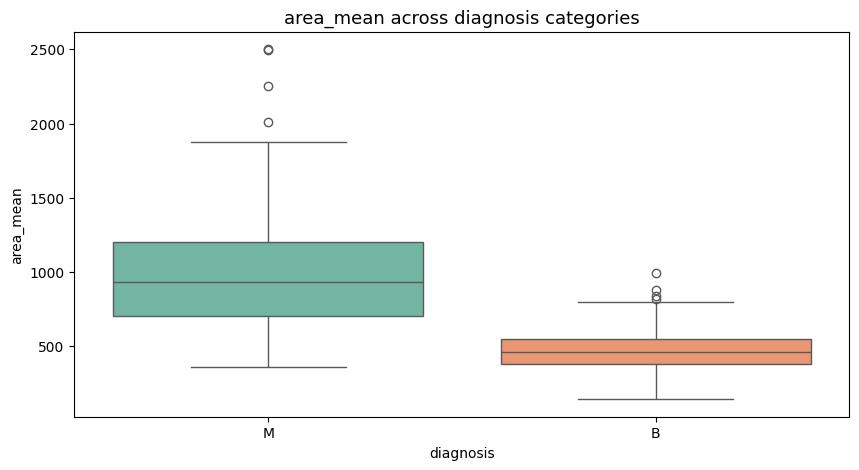

Feature: smoothness_mean vs diagnosis
               mean       std      min     max
diagnosis                                     
B          0.092478  0.013446  0.05263  0.1634
M          0.102898  0.012608  0.07371  0.1447



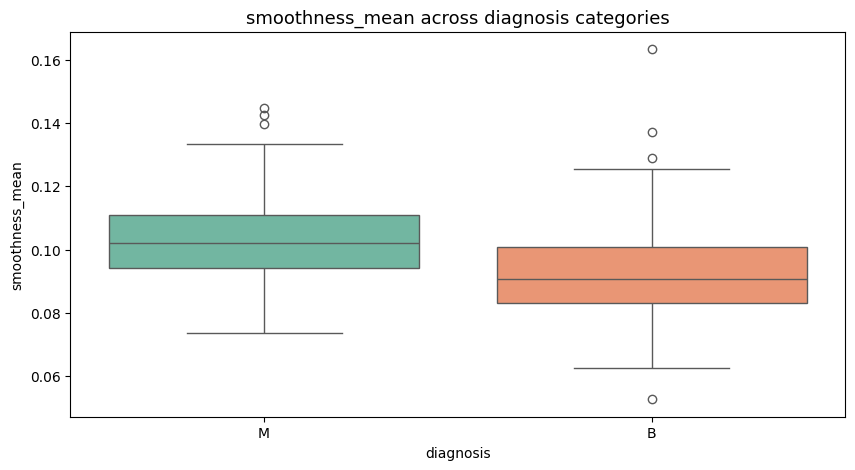

Feature: compactness_mean vs diagnosis
               mean       std      min     max
diagnosis                                     
B          0.080085  0.033750  0.01938  0.2239
M          0.145188  0.053987  0.04605  0.3454



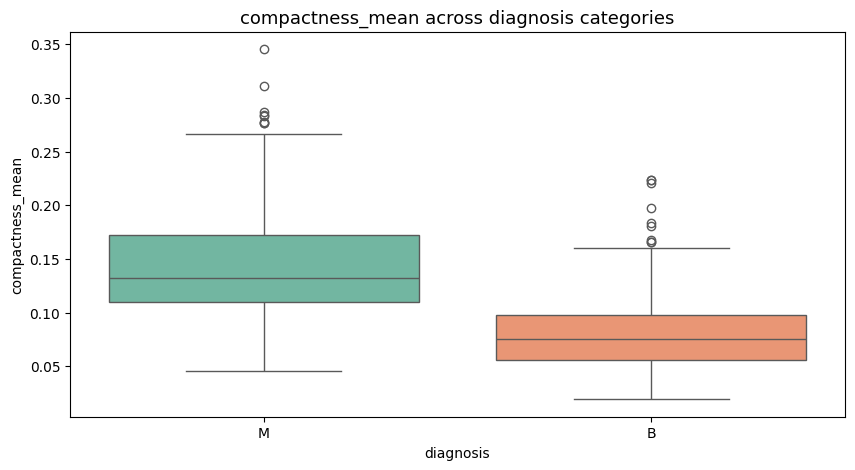

Feature: concavity_mean vs diagnosis
               mean       std      min     max
diagnosis                                     
B          0.046058  0.043442  0.00000  0.4108
M          0.160775  0.075019  0.02398  0.4268



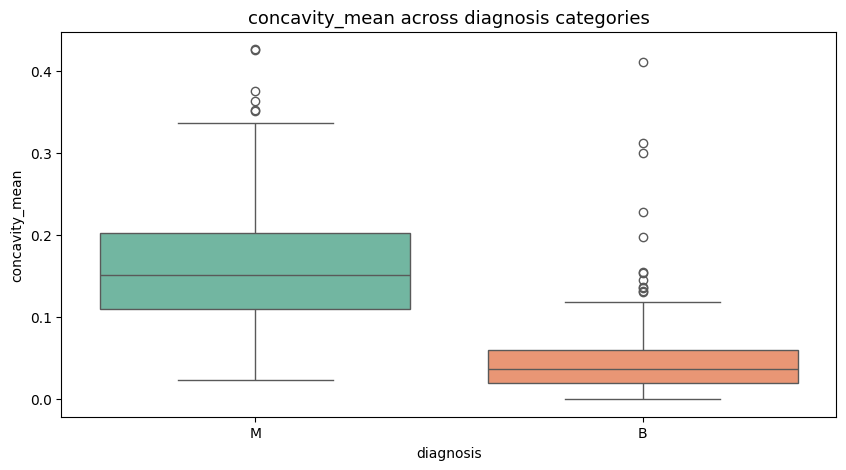

Feature: concave points_mean vs diagnosis
               mean       std      min      max
diagnosis                                      
B          0.025717  0.015909  0.00000  0.08534
M          0.087990  0.034374  0.02031  0.20120



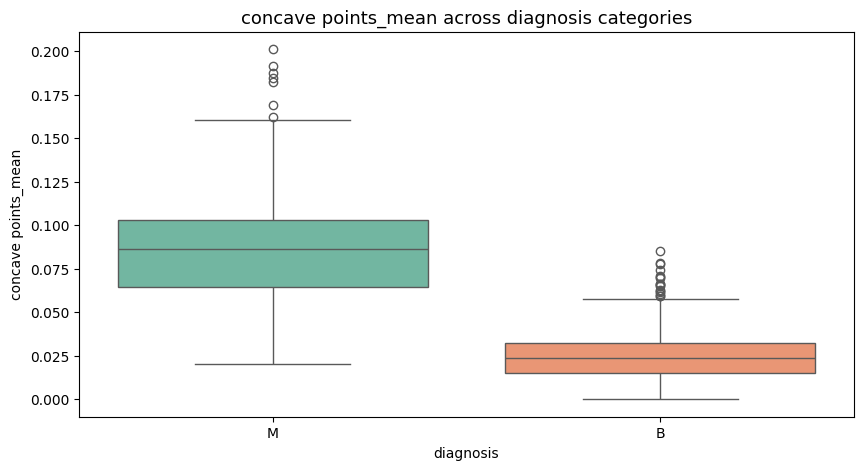

Feature: symmetry_mean vs diagnosis
               mean       std     min     max
diagnosis                                    
B          0.174186  0.024807  0.1060  0.2743
M          0.192909  0.027638  0.1308  0.3040



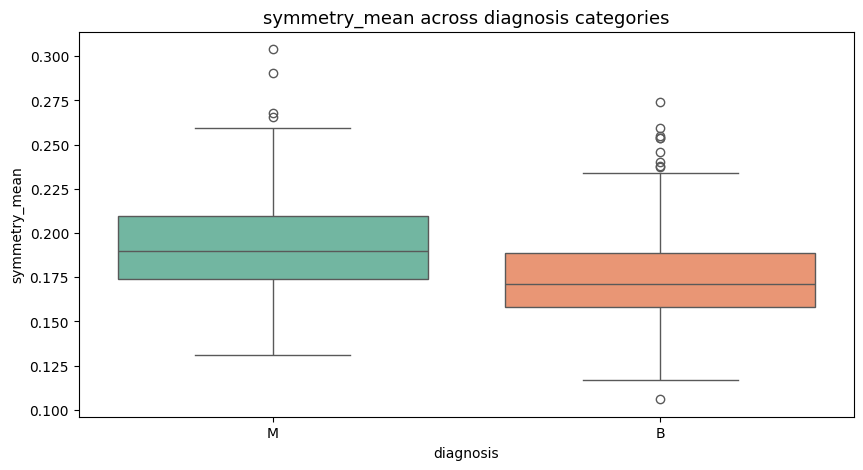

Feature: fractal_dimension_mean vs diagnosis
               mean       std      min      max
diagnosis                                      
B          0.062867  0.006747  0.05185  0.09575
M          0.062680  0.007573  0.04996  0.09744



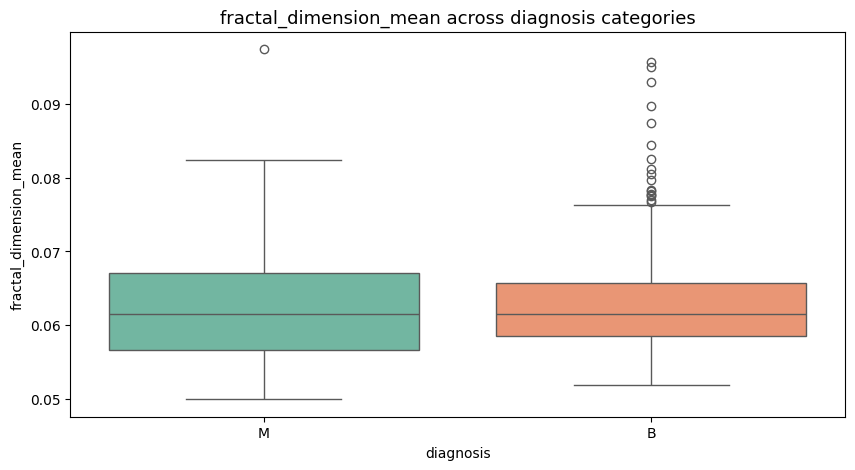

Feature: radius_se vs diagnosis
               mean       std     min     max
diagnosis                                    
B          0.284082  0.112570  0.1115  0.8811
M          0.609083  0.345039  0.1938  2.8730



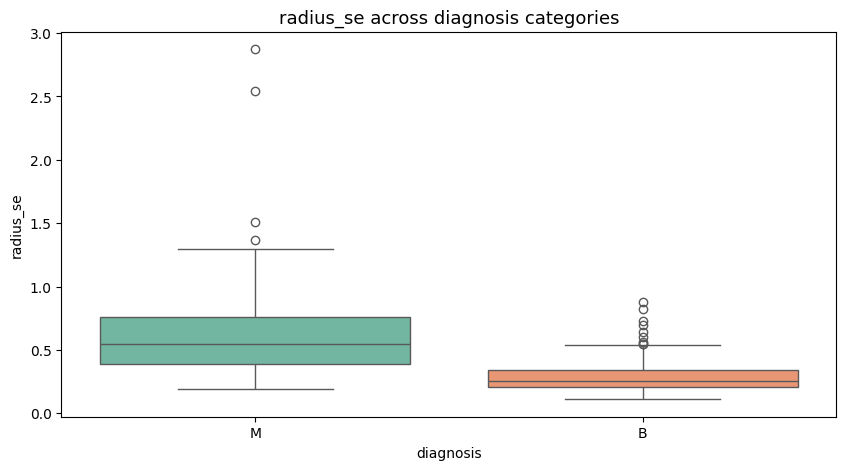

Feature: texture_se vs diagnosis
               mean       std     min    max
diagnosis                                   
B          1.220380  0.589180  0.3602  4.885
M          1.210915  0.483178  0.3621  3.568



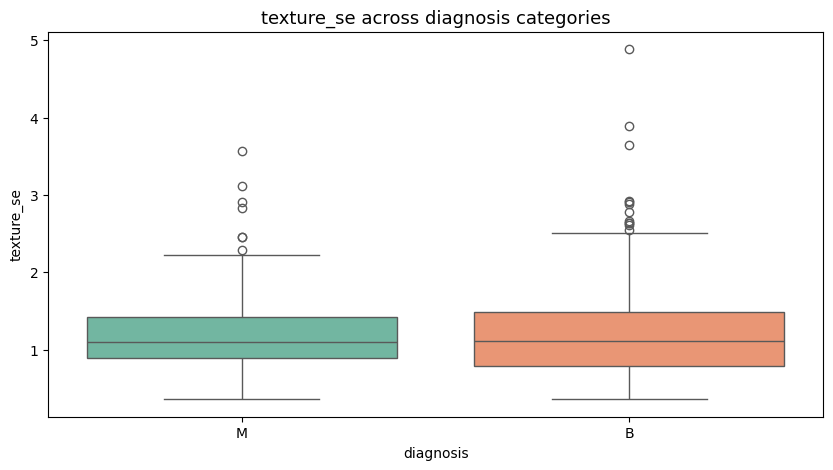

Feature: perimeter_se vs diagnosis
               mean       std    min     max
diagnosis                                   
B          2.000321  0.771169  0.757   5.118
M          4.323929  2.568546  1.334  21.980



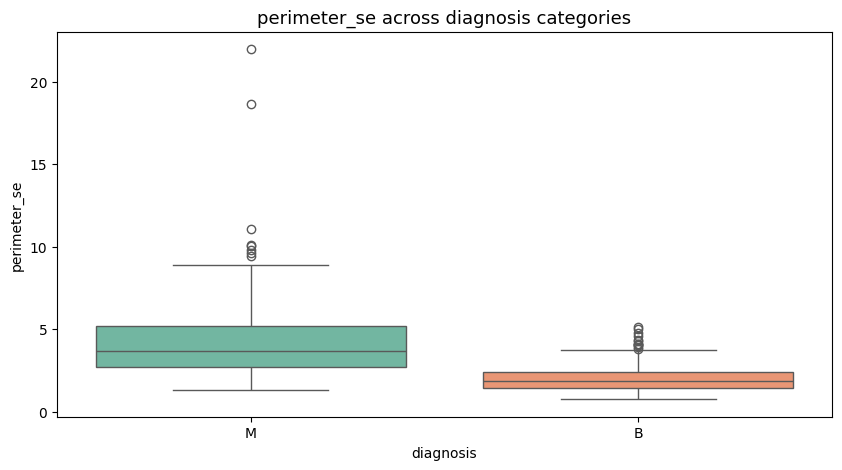

Feature: area_se vs diagnosis
                mean        std     min     max
diagnosis                                      
B          21.135148   8.843472   6.802   77.11
M          72.672406  61.355268  13.990  542.20



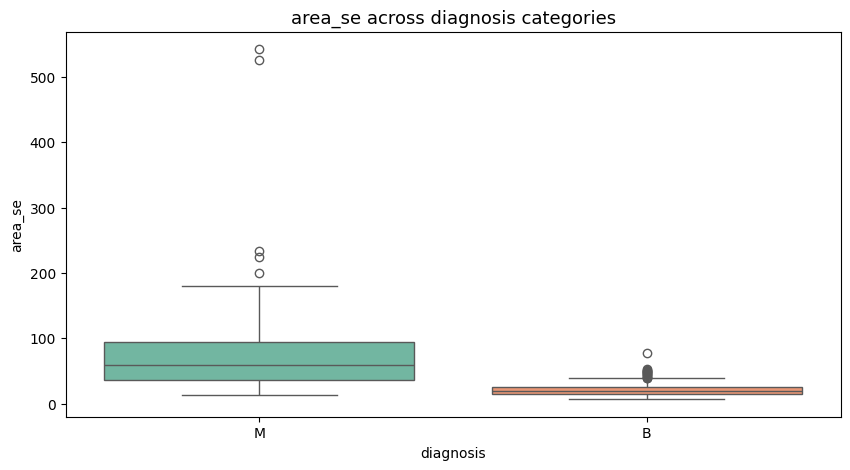

Feature: smoothness_se vs diagnosis
               mean       std       min      max
diagnosis                                       
B          0.007196  0.003061  0.001713  0.02177
M          0.006780  0.002890  0.002667  0.03113



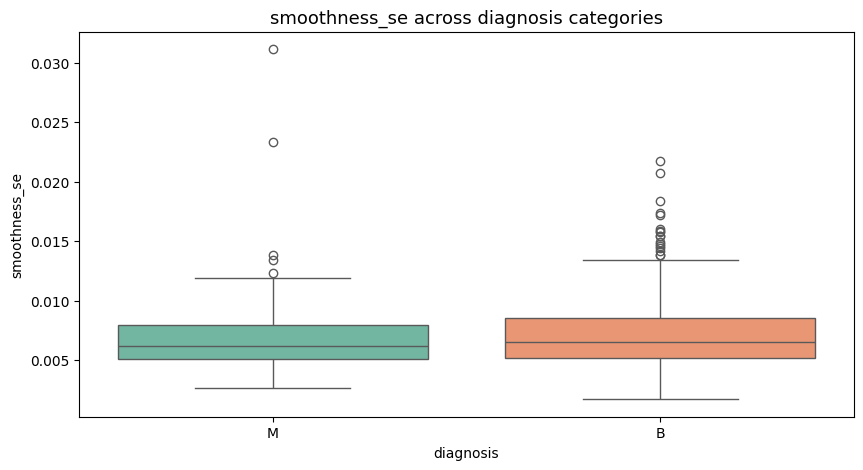

Feature: compactness_se vs diagnosis
               mean       std       min     max
diagnosis                                      
B          0.021438  0.016352  0.002252  0.1064
M          0.032281  0.018387  0.008422  0.1354



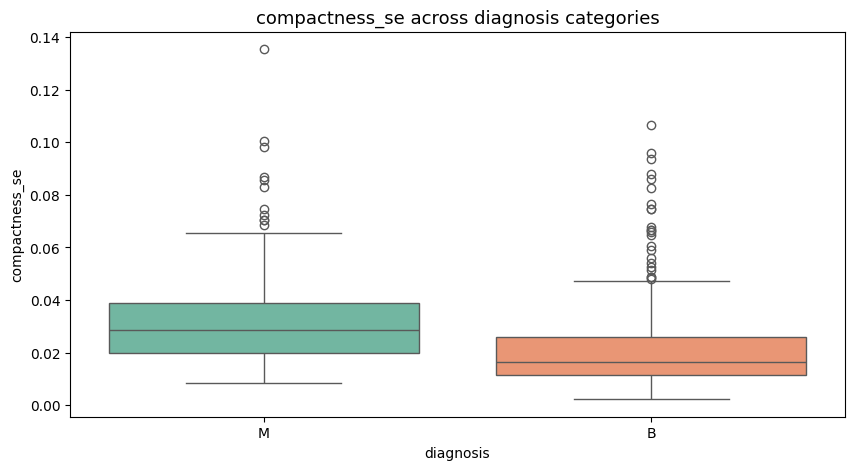

Feature: concavity_se vs diagnosis
               mean       std      min     max
diagnosis                                     
B          0.025997  0.032918  0.00000  0.3960
M          0.041824  0.021603  0.01101  0.1438



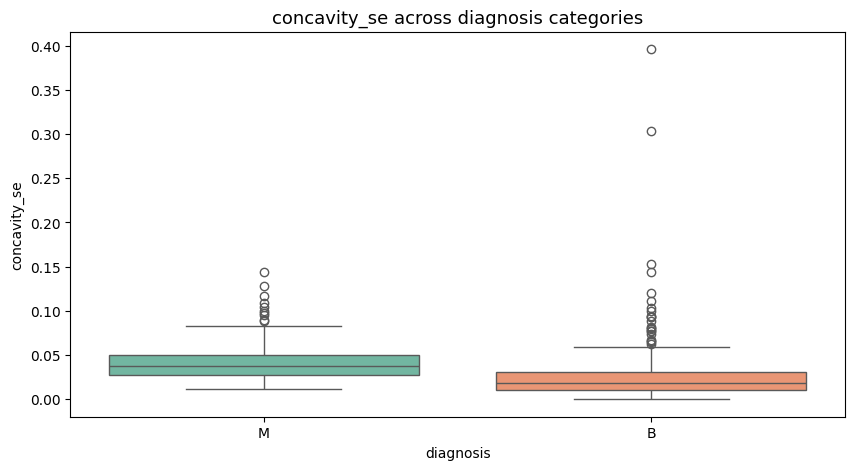

Feature: concave points_se vs diagnosis
               mean       std       min      max
diagnosis                                       
B          0.009858  0.005709  0.000000  0.05279
M          0.015060  0.005517  0.005174  0.04090



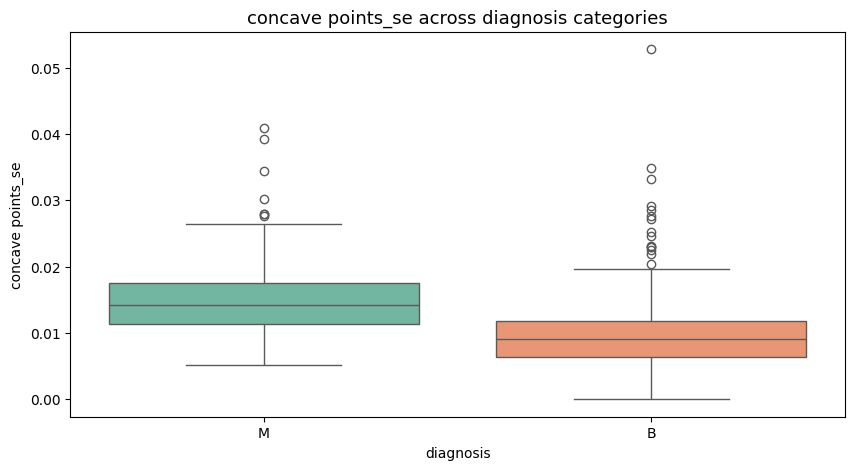

Feature: symmetry_se vs diagnosis
               mean       std       min      max
diagnosis                                       
B          0.020584  0.006999  0.009539  0.06146
M          0.020472  0.010065  0.007882  0.07895



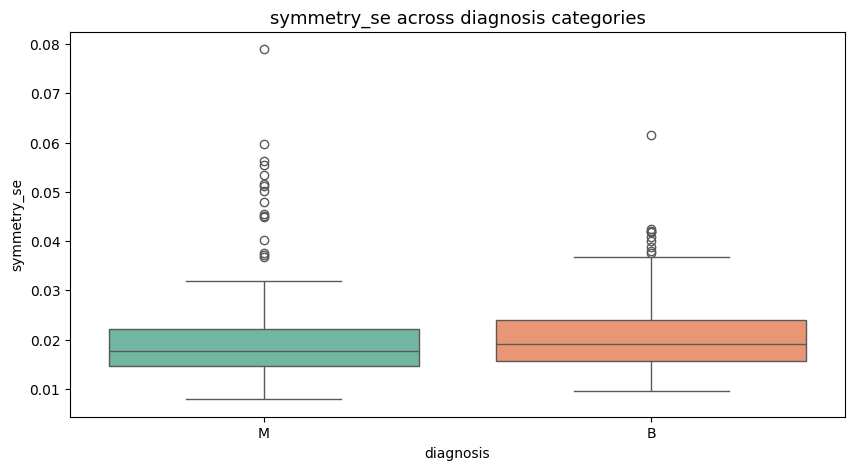

Feature: fractal_dimension_se vs diagnosis
               mean       std       min      max
diagnosis                                       
B          0.003636  0.002938  0.000895  0.02984
M          0.004062  0.002041  0.001087  0.01284



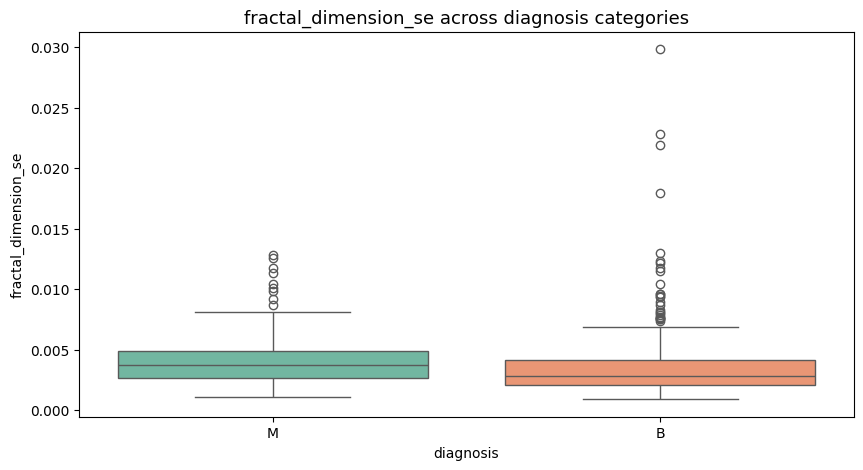

Feature: radius_worst vs diagnosis
                mean       std    min    max
diagnosis                                   
B          13.379801  1.981368   7.93  19.82
M          21.134811  4.283569  12.84  36.04



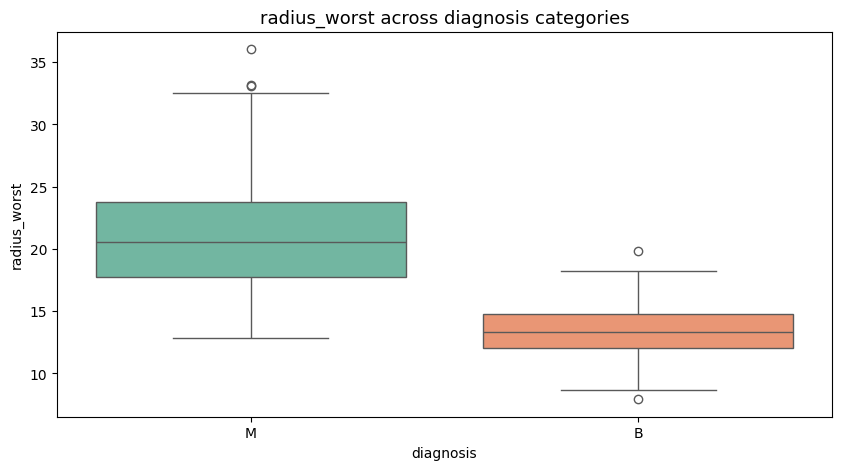

Feature: texture_worst vs diagnosis
                mean       std    min    max
diagnosis                                   
B          23.515070  5.493955  12.02  41.78
M          29.318208  5.434804  16.67  49.54



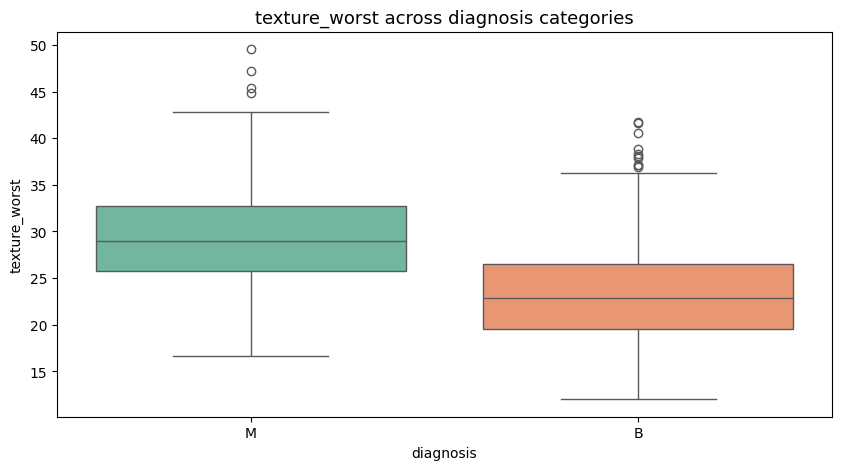

Feature: perimeter_worst vs diagnosis
                 mean        std    min    max
diagnosis                                     
B           87.005938  13.527091  50.41  127.1
M          141.370330  29.457055  85.10  251.2



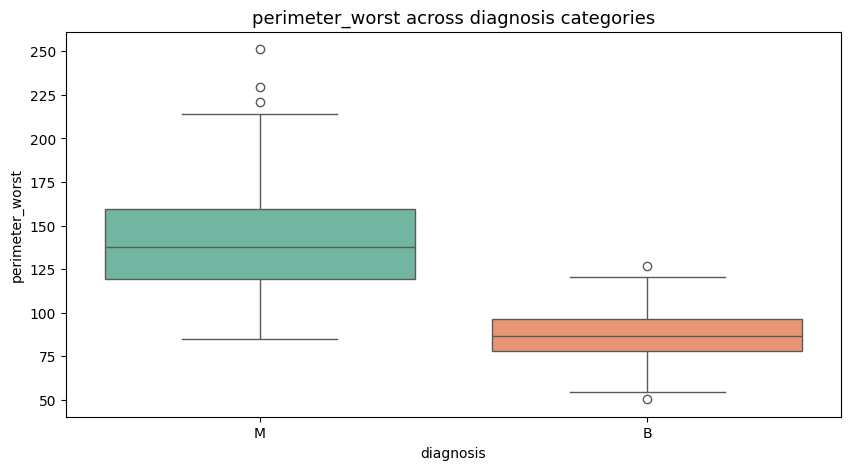

Feature: area_worst vs diagnosis
                  mean         std    min     max
diagnosis                                        
B           558.899440  163.601424  185.2  1210.0
M          1422.286321  597.967743  508.1  4254.0



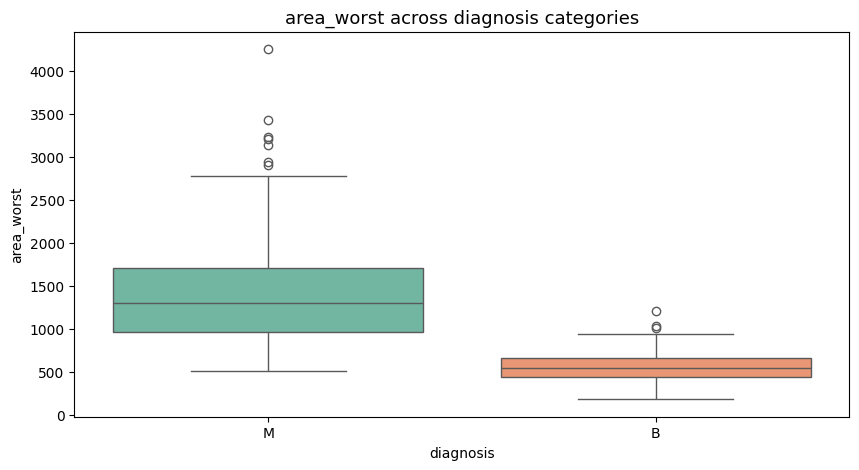

Feature: smoothness_worst vs diagnosis
               mean       std      min     max
diagnosis                                     
B          0.124959  0.020013  0.07117  0.2006
M          0.144845  0.021870  0.08822  0.2226



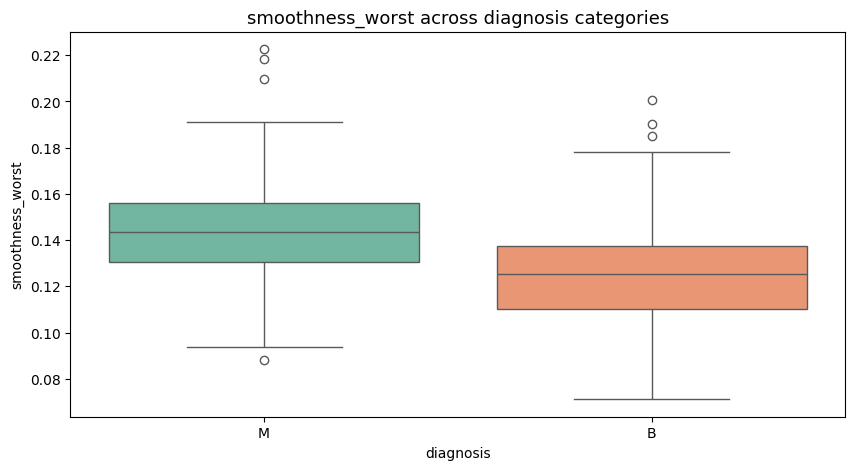

Feature: compactness_worst vs diagnosis
               mean       std      min     max
diagnosis                                     
B          0.182673  0.092180  0.02729  0.5849
M          0.374824  0.170372  0.05131  1.0580



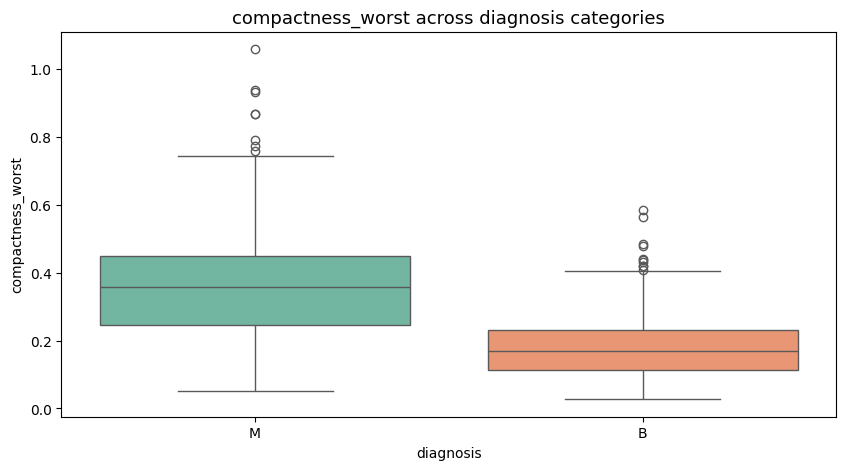

Feature: concavity_worst vs diagnosis
               mean       std      min    max
diagnosis                                    
B          0.166238  0.140368  0.00000  1.252
M          0.450606  0.181507  0.02398  1.170



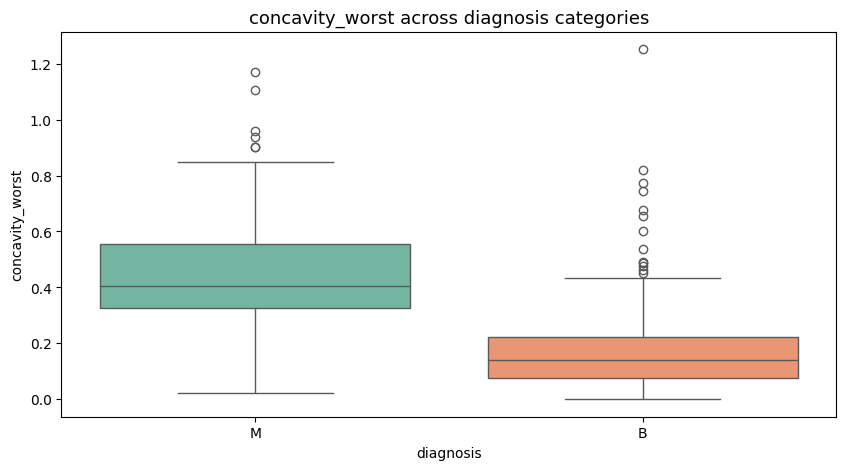

Feature: concave points_worst vs diagnosis
               mean       std      min    max
diagnosis                                    
B          0.074444  0.035797  0.00000  0.175
M          0.182237  0.046308  0.02899  0.291



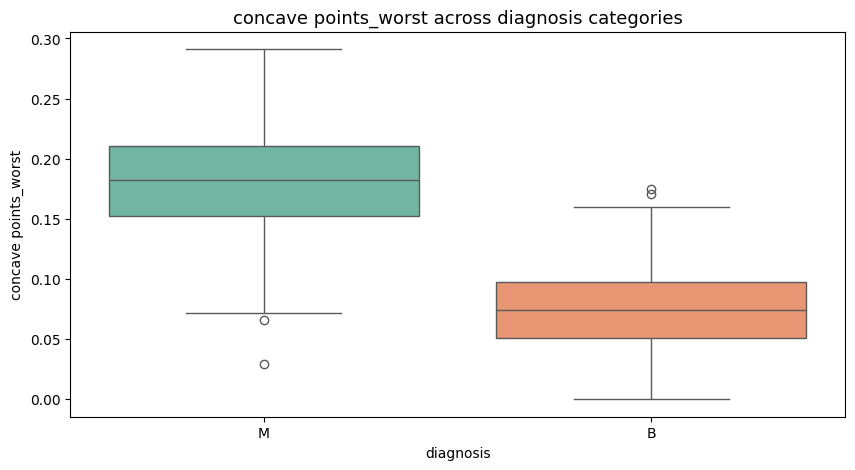

Feature: symmetry_worst vs diagnosis
               mean       std     min     max
diagnosis                                    
B          0.270246  0.041745  0.1566  0.4228
M          0.323468  0.074685  0.1565  0.6638



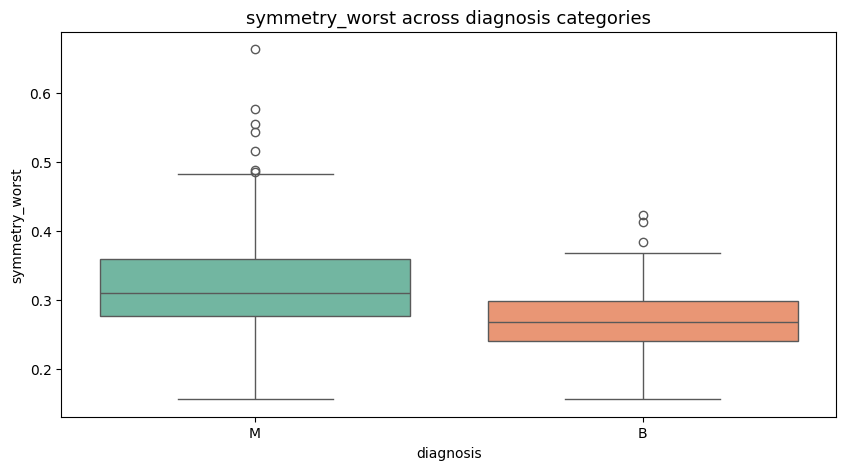

Feature: fractal_dimension_worst vs diagnosis
               mean       std      min     max
diagnosis                                     
B          0.079442  0.013804  0.05521  0.1486
M          0.091530  0.021553  0.05504  0.2075



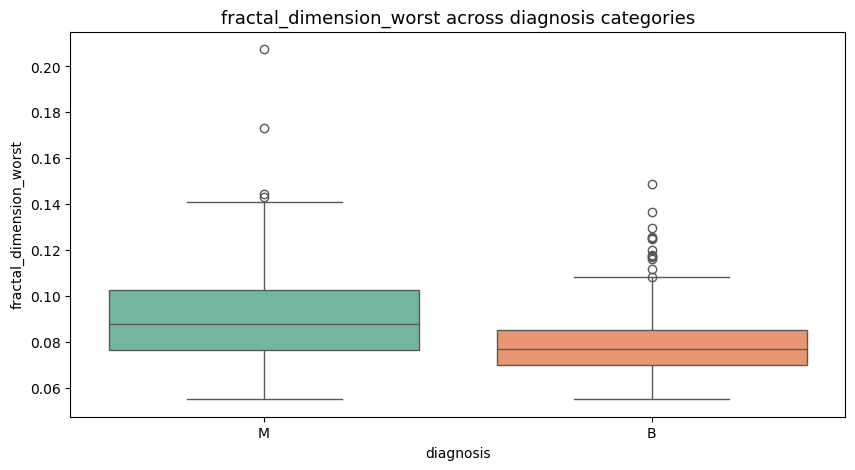

In [70]:
# Lets apply our function using loops.
for col in num_cols:
    bivariate_num_cat(breast_cancer_df, col, target='diagnosis')

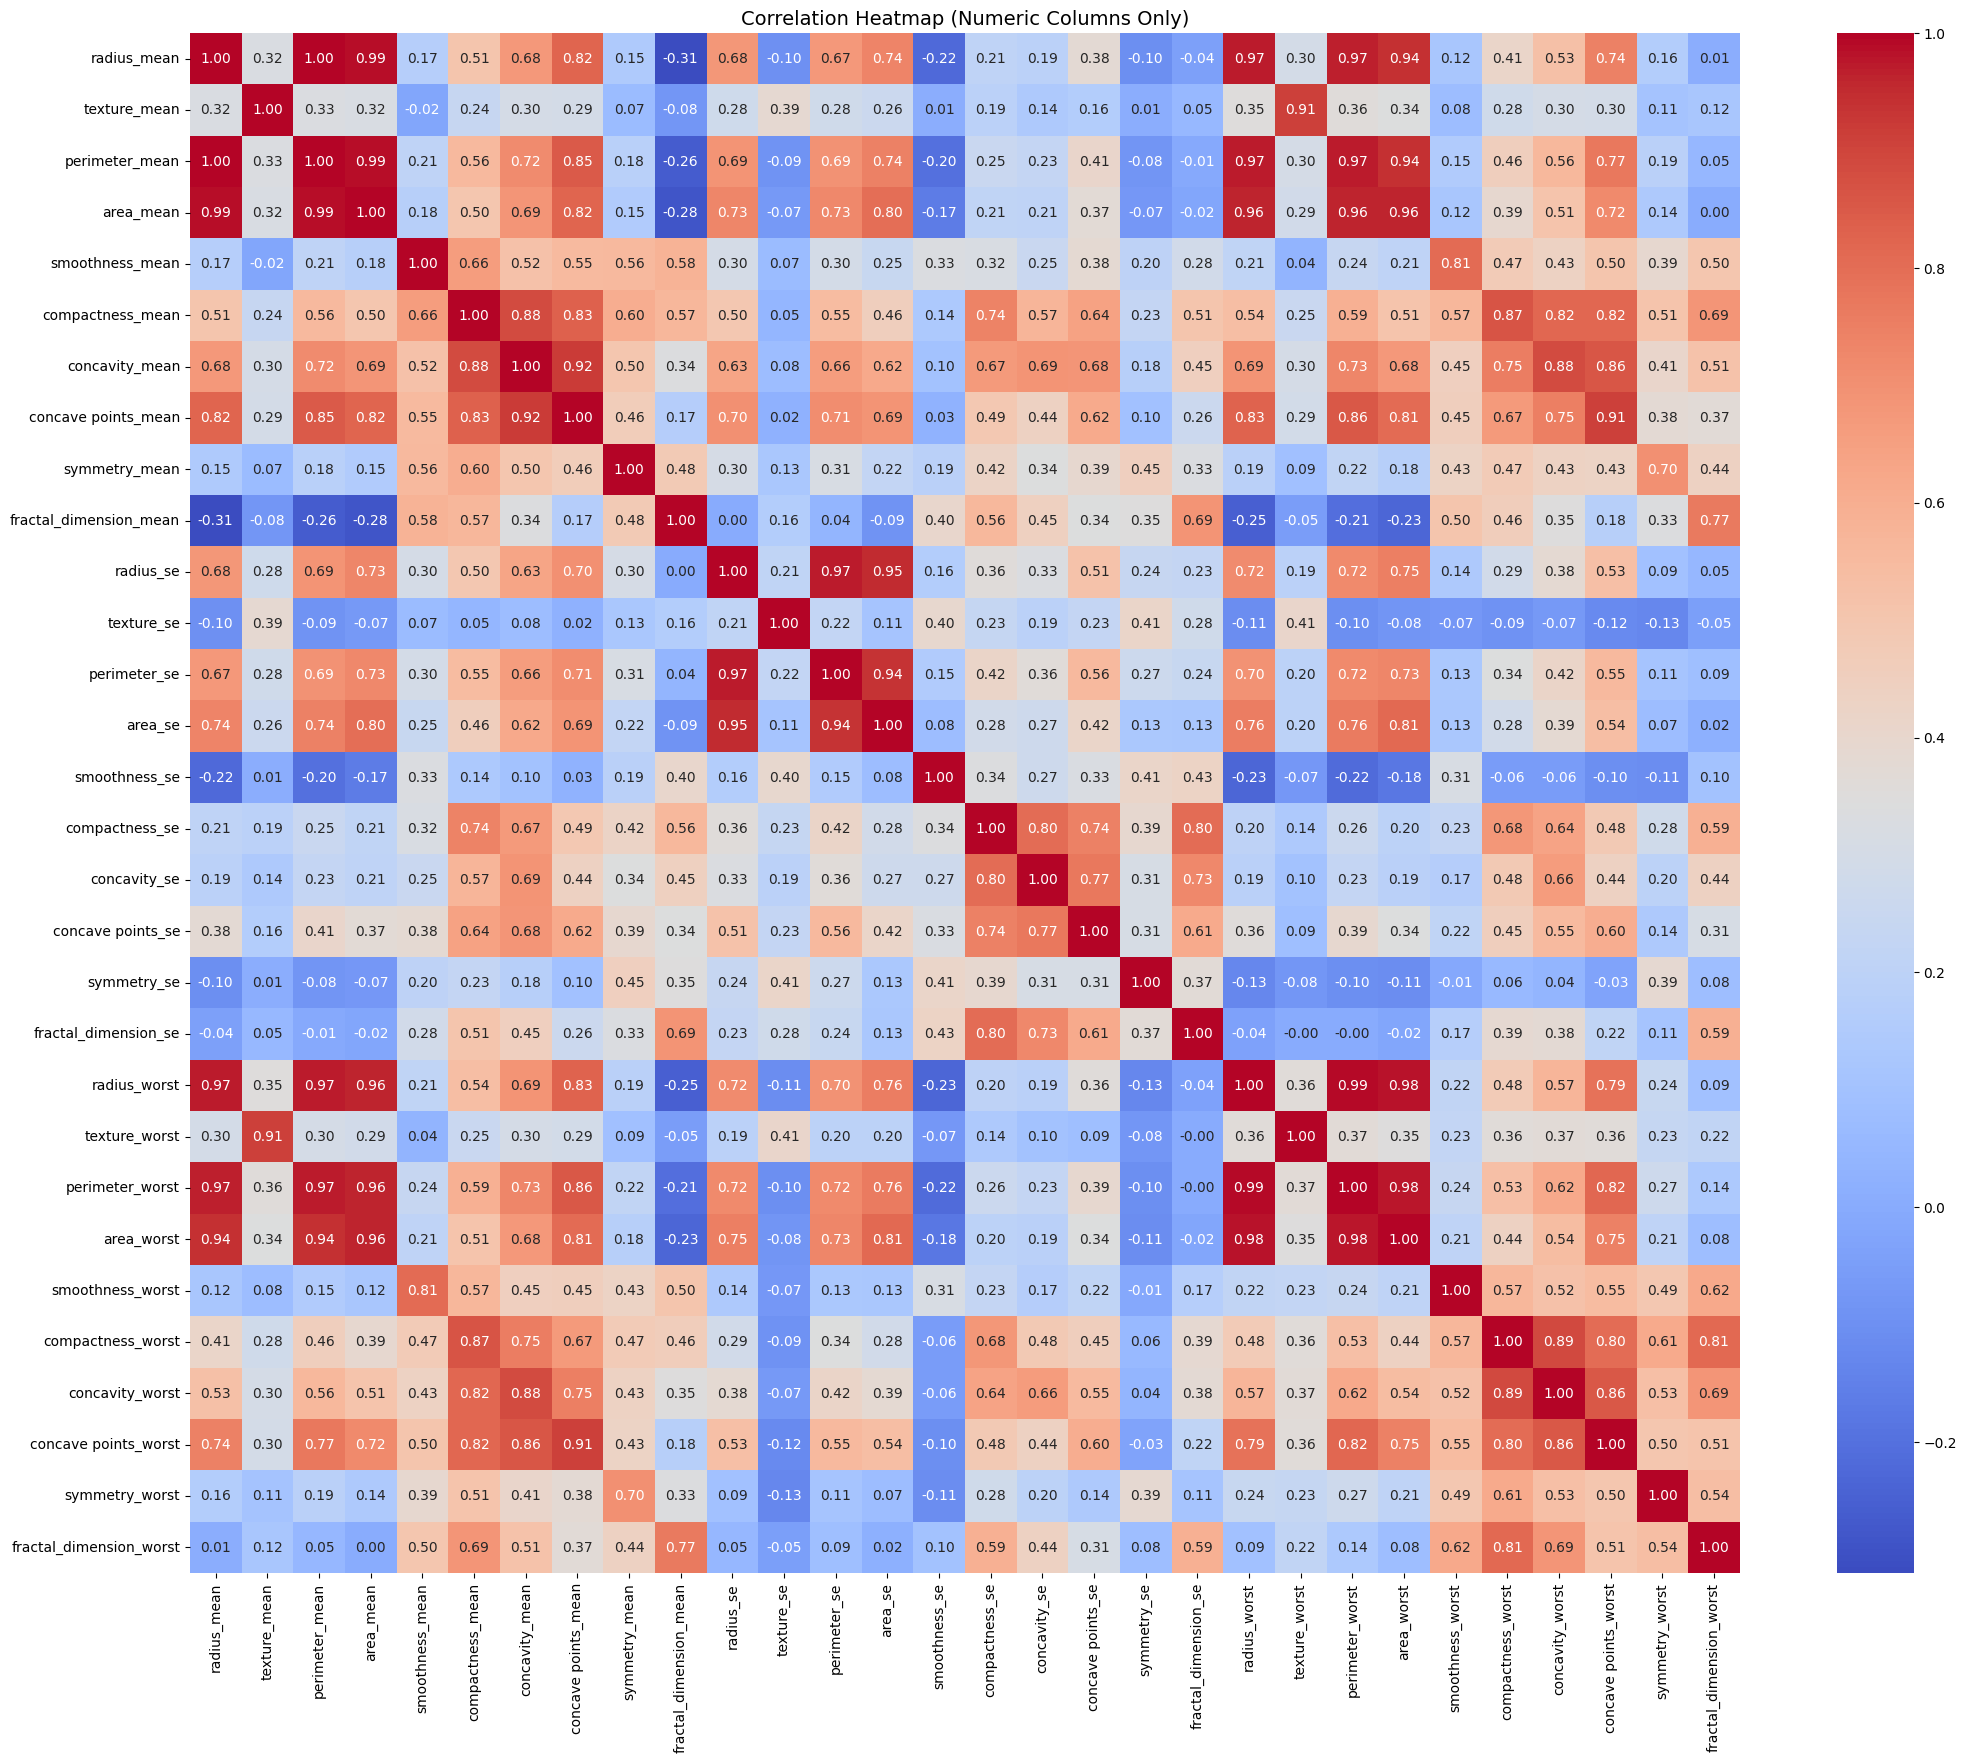

In [72]:
# Select only numeric columns
numeric_df = breast_cancer_df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Columns Only)', fontsize=14)
plt.show()